
# **Qiime2 tutorial - Parkinson’s Mouse Tutorial**
QIIME 2如同其在[官網](https://qiime2.org/)中提到的:QIIME 2™ is a next-generation microbiome bioinformatics platform that is extensible, free, open source, and community developed."是用來分析微生物次世代基因定序資料的開源軟體。

本教學將簡單敘述QIIME 2使用方式，對應qiime2官網文件的[Parkinson’s Mouse Tutorial](https://docs.qiime2.org/2023.5/tutorials/pd-mice/)實作教學，使用之16S rRNA基因定序資料源自於[Sampson et al., 2016](https://www.cell.com/cell/fulltext/S0092-8674(16)31590-2?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867416315902%3Fshowall%3Dtrue)的研究，此實驗證實了糞便之微生物菌相對Parkinson’s Disease (PD)症狀發展有所影響。其中一項實驗分別將來自健康對照組及PD患者之糞便微生物植入野生基因型或帶有易感染PD基因之小鼠體內。小鼠隨機分配至三個不同籠子飼養7周，並觀察其PD症狀表現。

僅採用實驗之小部分數據，共48個小鼠樣本，且各樣本之序列數列約為5000條。本實驗之所有原始定序資料可從EBI資料庫下載[PRJEB17694](https://www.ebi.ac.uk/ena/browser/view/PRJEB17694)，數據衍生之相關資料則可從[Qiita](https://qiita.ucsd.edu/)資料庫下載[study 10483](https://qiita.ucsd.edu/study/description/10483)。

# 實驗假說
本教學將探討，小鼠之微生物菌相分布受到其所移植之菌相來源影響，而菌相分別源自健康對照組及PD患者之糞便微生物。

# 環境設定
請閱讀並執行`install_package.ipynb`

完成上述步驟後，將新建立之`HMP_project`環境的binary執行檔路徑寫入環境變數中

In [1]:
import os
# 執行檔資訊
# 如果完成了1_install_package，已安裝conda env於自己的帳號中。
Add_Binarry_Path='~/.conda/envs/HMP_project/bin/'
# 如果尚未下載完成conda env，則先使用已建立好的
# Add_Binarry_Path='/home/s4107037054/.conda/envs/HMP_project/bin/'
os.environ['PATH']=Add_Binarry_Path+':'+os.environ['PATH']

# 建立專案目錄
開始分析之前，建議建立一個專屬的分析目錄，將所有分析相關之input/output檔存放一起方便管理。

In [3]:
# 執行一次即可，重複執行會持續在當前目錄建新資料夾
project_folder = "mouse_tutorial"
!mkdir -p ./{project_folder}/seqs
!mkdir -p ./{project_folder}/qza
!mkdir -p ./{project_folder}/qzv
# !表示執行bash命令
%cd ./mouse_tutorial 
# %cd表示切換路徑

/home/s4107037054/HMP_project/mouse_tutorial


- `!...`在jupyterlab中表示，透過bash執行後面指令
- `mkdir ...`建立名為...的目錄
- `%cd ...`移動至名為...的目錄底下

# 準備資料

## (1). **XXXX.fastq:** 定序的原始壓縮檔案
先透過URL下載此教學使用的範例壓縮檔(.zip)

In [4]:
!wget \
-O "demultiplexed_seqs.zip" \
"https://data.qiime2.org/2023.5/tutorials/pd-mice/demultiplexed_seqs.zip"

--2023-08-24 09:16:30--  https://data.qiime2.org/2023.5/tutorials/pd-mice/demultiplexed_seqs.zip
Resolving lgn304-v304 (lgn304-v304)... 172.17.26.4
Connecting to lgn304-v304 (lgn304-v304)|172.17.26.4|:53128... connected.
Proxy request sent, awaiting response... 302 FOUND
Location: https://s3-us-west-2.amazonaws.com/qiime2-data/2023.5/tutorials/pd-mice/demultiplexed_seqs.zip [following]
--2023-08-24 09:16:31--  https://s3-us-west-2.amazonaws.com/qiime2-data/2023.5/tutorials/pd-mice/demultiplexed_seqs.zip
Connecting to lgn304-v304 (lgn304-v304)|172.17.26.4|:53128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 21508775 (21M) [application/zip]
Saving to: 'demultiplexed_seqs.zip'

demultiplexed_seqs. 100%[===================>]  20.51M  10.6MB/s    in 1.9s    

2023-08-24 09:16:34 (10.6 MB/s) - 'demultiplexed_seqs.zip' saved [21508775/21508775]



再透過`unzip`將zip檔解壓縮。所有原始序列壓縮檔(.fastq.gz)存放在`demultiplexed_seqs/`。**注意: 輸入qiime2分析之序列原始檔都需要進行資料壓縮，指令如下:**
```
# 壓縮單一檔案
gzip filename.fastq
# 壓縮目錄下所有檔案
gzip folder/*
```

In [5]:
!unzip demultiplexed_seqs.zip

Archive:  demultiplexed_seqs.zip
   creating: demultiplexed_seqs/
  inflating: demultiplexed_seqs/10483.recip.539.ASO.PD4.D7_4_L001_R1_001.fastq.gz  
  inflating: demultiplexed_seqs/10483.recip.539.ASO.PD4.D14_5_L001_R1_001.fastq.gz  
  inflating: demultiplexed_seqs/10483.recip.413.WT.HC2.D7_12_L001_R1_001.fastq.gz  
  inflating: demultiplexed_seqs/10483.recip.220.WT.OB1.D7_30_L001_R1_001.fastq.gz  
  inflating: demultiplexed_seqs/10483.recip.458.ASO.HC3.D49_2_L001_R1_001.fastq.gz  
  inflating: demultiplexed_seqs/10483.recip.538.WT.PD4.D21_4_L001_R1_001.fastq.gz  
  inflating: demultiplexed_seqs/10483.recip.459.WT.HC3.D14_2_L001_R1_001.fastq.gz  
  inflating: demultiplexed_seqs/10483.recip.461.ASO.HC3.D7_20_L001_R1_001.fastq.gz  
  inflating: demultiplexed_seqs/10483.recip.465.ASO.PD3.D14_16_L001_R1_001.fastq.gz  
  inflating: demultiplexed_seqs/10483.recip.461.ASO.HC3.D21_11_L001_R1_001.fastq.gz  
  inflating: demultiplexed_seqs/10483.recip.540.ASO.HC4.D7_7_L001_R1_001.fastq.gz  
  i

## (2). **Manifest:** 樣本清單檔案 manifest.tsv
manifest 是清單的意思，目的是告訴 QIIME2 .fastq.gz 的路徑在哪裡，以及該檔案所對應的樣本名稱為何，

In [25]:
import os, sys
seqs_folder = "seqs/" #原始序列存放的位置
forward_tail = ".fastq.gz" #forward序列檔案的結尾
reverse_tail = "" #reverse序列檔案的結尾，若為單尾定序，則將這欄改為""

abs_seqs_folder = os.path.abspath(seqs_folder)
seq_files = os.listdir(seqs_folder)
manifest = {} #以字典的形式儲存sample-id(key)和absolute-filepath(value)
if reverse_tail != "" and forward_tail != "": #雙尾定序
    for seq in seq_files:
        for_res_check = 0 # 如果是forward，判定1，若是reverse，判定2
        # 判斷是forward還是reverse
        if forward_tail in seq: 
            for_res_check = 1
            basename = seq.replace(forward_tail,"")
        elif reverse_tail in seq:
            for_res_check = 2
            basename = seq.replace(reverse_tail,"")
        else:
            sys.exit("ERROR: NO align tail in filename. Please check tails.")
        seq_abs_path = f"{abs_seqs_folder}{seq}" # seq的絕對路徑
        if for_res_check==1:
            if basename in manifest: #雙尾定序的value指定為list，list[0]放forward
                manifest[basename][0] = seq_abs_path
            else:
                manifest[basename]=[seq_abs_path,""]
        elif for_res_check==2:
            if basename in manifest: #雙尾定序的value指定為list，list[1]放reverse
                manifest[basename][1] = seq_abs_path
            else:
                manifest[basename]=["",seq_abs_path]
        sorted_manifest = {}# 重新排列manifest，以basename排序
        for sample_id in sorted(list(manifest.keys())):
            sorted_manifest[sample_id] = manifest[sample_id]
        with open("manifest.tsv", "w") as manifest_w: #寫進manifest.csv
            manifest_w.write("sample-id\tforward-absolute-filepath\treverse-absolute-filepath\n") # header
            for sample_id, absolute_filepath in sorted_manifest.items():
                manifest_w.write(f"{sample_id}\t{absolute_filepath[0]}\t{absolute_filepath[1]}\n")
                
elif reverse_tail == "" and forward_tail != "": #單尾定序
    for seq in seq_files:
        seq_basename = seq.replace(forward_tail,"")
        seq_abs_path = f"{abs_seqs_folder}{seq}" # seq的絕對路徑
        manifest[seq_basename] = seq_abs_path
    sorted_manifest = {}# 重新排列manifest，以basename排序
    for sample_id in sorted(list(manifest.keys())):
        sorted_manifest[sample_id] = manifest[sample_id]
    with open("manifest.tsv", "w") as manifest_w:
        manifest_w.write("sample-id\tabsolute-filepath\n") # header
        for sample_id, absolute_filepath in sorted_manifest.items():
            manifest_w.write(f"{sample_id}\t{absolute_filepath}\n")
else:
    sys.exit("ERROR: Please set tails.")

透過`head -n 10`來查看metadata前十行內容:

In [26]:
!head -n 10 manifest.tsv

sample-id	absolute-filepath
recip.220.WT.OB1.D7	/home/s4107037054/HMP_project/mouse_tutorial/seqsrecip.220.WT.OB1.D7.fastq.gz
recip.290.ASO.OB2.D1	/home/s4107037054/HMP_project/mouse_tutorial/seqsrecip.290.ASO.OB2.D1.fastq.gz
recip.389.WT.HC2.D21	/home/s4107037054/HMP_project/mouse_tutorial/seqsrecip.389.WT.HC2.D21.fastq.gz
recip.391.ASO.PD2.D14	/home/s4107037054/HMP_project/mouse_tutorial/seqsrecip.391.ASO.PD2.D14.fastq.gz
recip.391.ASO.PD2.D21	/home/s4107037054/HMP_project/mouse_tutorial/seqsrecip.391.ASO.PD2.D21.fastq.gz
recip.391.ASO.PD2.D7	/home/s4107037054/HMP_project/mouse_tutorial/seqsrecip.391.ASO.PD2.D7.fastq.gz
recip.400.ASO.HC2.D14	/home/s4107037054/HMP_project/mouse_tutorial/seqsrecip.400.ASO.HC2.D14.fastq.gz
recip.401.ASO.HC2.D7	/home/s4107037054/HMP_project/mouse_tutorial/seqsrecip.401.ASO.HC2.D7.fastq.gz
recip.403.ASO.PD2.D21	/home/s4107037054/HMP_project/mouse_tutorial/seqsrecip.403.ASO.PD2.D21.fastq.gz


**columns**包含，樣本名稱(sample-id)對應metadata的sample-name，以及序列原始檔案的**絕對路徑**(absolute-filepath)，指定文件的**完整**位置。在這裡使用`$PWD`變數，它包含了當前目錄的完整路徑。

- [QIIME2官方文件說明](https://docs.qiime2.org/2023.5/tutorials/importing/#fastq-manifest-formats)

## (3). **Metadata:** 註釋資料 metadata.tsv
metadata記錄了實驗各樣本之不同特徵。透過`wget`下載本教學使用之metadata，並檢視其內容。先做好manifest，可以再用excel編輯metadata.tsv，比較方便一些

In [6]:
!wget \
-O "metadata.tsv" \
"https://data.qiime2.org/2023.5/tutorials/pd-mice/sample_metadata.tsv" 

--2023-08-24 09:17:04--  https://data.qiime2.org/2023.5/tutorials/pd-mice/sample_metadata.tsv
Resolving lgn304-v304 (lgn304-v304)... 172.17.26.4
Connecting to lgn304-v304 (lgn304-v304)|172.17.26.4|:53128... connected.
Proxy request sent, awaiting response... 302 FOUND
Location: https://docs.google.com/spreadsheets/d/e/2PACX-1vQH04jrXQddOv0QPkk6_9-kwiNYfbdcCmh4nX79RnfIOqtC-VVIWrEh2Pkl9y49JHb6Oy2a2390-oKL/pub?gid=1509704122&single=true&output=tsv [following]
--2023-08-24 09:17:04--  https://docs.google.com/spreadsheets/d/e/2PACX-1vQH04jrXQddOv0QPkk6_9-kwiNYfbdcCmh4nX79RnfIOqtC-VVIWrEh2Pkl9y49JHb6Oy2a2390-oKL/pub?gid=1509704122&single=true&output=tsv
Connecting to lgn304-v304 (lgn304-v304)|172.17.26.4|:53128... connected.
Proxy request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0k-60-sheets.googleusercontent.com/pub/54bogvaave6cua4cdnls17ksc4/jgtral1je142hm4ph8pbrcgug8/1692839825000/105250506097979753968/*/e@2PACX-1vQH04jrXQddOv0QPkk6_9-kwiNYfbdcCmh4nX79RnfIOq

- `wget ...`: 從指定的 URL 下載文件
- `\`: 當命令分成多行時，指示shell指令接續下一行執行
- `-O ...`: 檔案output位置，輸出在當前目錄則只需命名檔案名稱即可

下一步，檢視metadata的內容，對接下來的分析流程至關重要，這裡將使用到qiime2的指令，產出`metadata.qzv`。

In [8]:
!qiime metadata tabulate \
--m-input-file metadata.tsv \
--o-visualization metadata.qzv

Saved Visualization to: metadata.qzv


- `qiime metadata tabulate`: 用於將輸入資料進行整理和視覺化。
- `--m-input-file ...`: metadata.tsv之路徑，因為當前目錄跟檔案路徑是同樣的，因此輸入檔案名稱即可。
- `--o-visualization ...`: metadata.qzv輸出路徑。

執行完以上指令後會產生output在當前目錄下，輸出檔案為`qzv`檔，可上傳至[Qiime2 view](https://view.qiime2.org/)視覺化。

或是透過head -n 10來查看metadata前十行內容:

In [25]:
!head -n 10 metadata.tsv

sample_name	barcode	mouse_id	genotype	cage_id	donor	donor_status	days_post_transplant	genotype_and_donor_status
#q2:types		categorical	categorical	categorical	categorical	categorical	numeric	categorical
recip.220.WT.OB1.D7	CCTCCGTCATGG	457	wild type	C35	hc_1	Healthy	49	wild type and Healthy
recip.290.ASO.OB2.D1	AACAGTAAACAA	456	susceptible	C35	hc_1	Healthy	49	susceptible and Healthy
recip.389.WT.HC2.D21	ATGTATCAATTA	435	susceptible	C31	hc_1	Healthy	21	susceptible and Healthy
recip.391.ASO.PD2.D14	GTCAGTATGGCT	435	susceptible	C31	hc_1	Healthy	14	susceptible and Healthy
recip.391.ASO.PD2.D21	AGACAGTAGGAG	437	susceptible	C31	hc_1	Healthy	21	susceptible and Healthy
recip.391.ASO.PD2.D7	GGTCTTAGCACC	435	susceptible	C31	hc_1	Healthy	7	susceptible and Healthy
recip.400.ASO.HC2.D14	CGTTCGCTAGCC	437	susceptible	C31	hc_1	Healthy	14	susceptible and Healthy
recip.401.ASO.HC2.D7	ATTTACAATTGA	437	susceptible	C31	hc_1	Healthy	7	susceptible and Healthy


**columns**儲存了樣本名稱(sample_name)，barcode，實驗小鼠編號(mouse_id)，基因型(genotype)，籠子編號(cage_id)，菌相來源(donor)，人類健康狀態(donor_status)，微生物菌相移植天數(days_post_transplant)，小鼠基因型與人類健康狀態(genotype_and_donor_status)。**row 2**紀錄每個特徵的屬性，樣本名稱(column 1)會用`#q2:types`表示，其餘的依照類別型(categorical)或數值型(numeric)進行分類。接著每個row代表一個樣本。

準備好以下檔案，接著可以開始分析了:
- 原始序列檔案(.fastq.gz)
- manifest.tsv
- metadata.tsv

# **進入qiime2分析**

# 輸入序列原始資料，存成qza格式
`qza`: qiime2中儲存資料的格式，進行任何分析時input皆為qza。在qiime2中，所有的資料都以特定[語義類型(Semantic types)](https://docs.qiime2.org/2023.5/semantic-types/)的Artifact儲存，並且分析。
`qza`: 與qza對應的格式，供人類觀看的視覺化檔案，可上傳至[qiime2 view](https://view.qiime2.org/)察看結果。

將將序列作為`SampleData[SequencesWithQuality]`進行導入，這是已解褶的單端序列格式。如果我們想導入成對序列(paired-end)，則需要指定語義類型(Semantic types)`SampleData[PairedEndSequencesWithQuality]`。

In [29]:
!qiime tools import \
--type "SampleData[SequencesWithQuality]" \
--input-format SingleEndFastqManifestPhred33V2 \
--input-path ./manifest.tsv \
--output-path ./demux_seqs.qza

Imported ./manifest.tsv as SingleEndFastqManifestPhred33V2 to ./demux_seqs.qza


- `qiime tools import`: 使用此命令將資料輸入。可以指定`--help`來查看詳細使用方法。
- `--type ...`: artifact的Semantic type，若想輸入成對序列，則指定SampleData[PairedEndSequencesWithQuality]。
- `--input-format ...`: FASTQ 格式中的序列品值編碼方式，比較常見的為`Phred33V2`，其次還有`Phred64V2`，其中`V2`代表第二版。若原始資料為成對序列並以Phred64V2進行編碼，則指定`PairedEndFastqManifestPhred64V2`。
- `--input-path ...`: manifest之檔案路徑，`./`表示當前目錄。
- `--output-path ...`: qza檔案輸出位置，這裡我們設定輸出在當前目錄下，並命名為`demux_seqs.qza`。

In [31]:
!qiime tools import --help

Usage: qiime tools import [OPTIONS]

  Import data to create a new QIIME 2 Artifact. See https://docs.qiime2.org/
  for usage examples and details on the file types and associated semantic
  types that can be imported.

Options:
  --type TEXT             The semantic type of the artifact that will be
                          created upon importing. Use --show-importable-types
                          to see what importable semantic types are available
                          in the current deployment.                [required]
  --input-path PATH       Path to file or directory that should be imported.
                                                                    [required]
  --output-path ARTIFACT  Path where output artifact should be written.
                                                                    [required]
  --input-format TEXT     The format of the data to be imported. If not
                          provided, data must be in the format expected by the
     

接著可以透過`qiime demux summarize`命令來檢查序列以及樣本的测序深度(sequencing depth)。該命令會提供每個樣本中序列的數量信息，以及序列的品質(quality score)。

In [38]:
!qiime demux summarize \
--i-data ./demux_seqs.qza \
--p-n 20000 \
--o-visualization ./demux_seqs.qzv

Saved Visualization to: ./demux_seqs.qzv


- `--i-data ...`: demux_seqs.qza之檔案路徑。
- `--p-n ...`: 指定要從所有序列中隨機選擇的序列數量，預設為10000。選中的序列用以生成序列品質分數圖(quality plot)。
- `--o-visualization ...`: qzv檔案輸出位置，命名為demux_seqs.qzv。

In [35]:
!qiime demux summarize --help

Usage: qiime demux summarize [OPTIONS]

  Summarize counts per sample for all samples, and generate interactive
  positional quality plots based on `n` randomly selected sequences.

Inputs:
  --i-data ARTIFACT SampleData[SequencesWithQuality |
    PairedEndSequencesWithQuality | JoinedSequencesWithQuality]
                       The demultiplexed sequences to be summarized.
                                                                    [required]
Parameters:
  --p-n INTEGER        The number of sequences that should be selected at
                       random for quality score plots. The quality plots will
                       present the average positional qualities across all of
                       the sequences selected. If input sequences are paired
                       end, plots will be generated for both forward and
                       reverse reads for the same `n` sequences.
                                                              [default: 10000]
Outputs:

從`demux_seqs.qzv`的quality plot可以判斷序列的整體品質分布，並**決定是否要進行修剪(trimmed)，從哪個位置(position)進行修剪。**將鼠標移動到box顯示該position的seven-number summary。通常定序剛開始與結束的兩端品質都會比較差，若序列頭尾品質低於20可以考慮切除。

Q = -10log10p（p表示測序的錯誤率，Q表示鹼基質量分數）

- Q Value,正確率,錯誤率
- 10, 90%, 10%
- 20, 99%, 1%
- 30, 99.9%, 0.1%

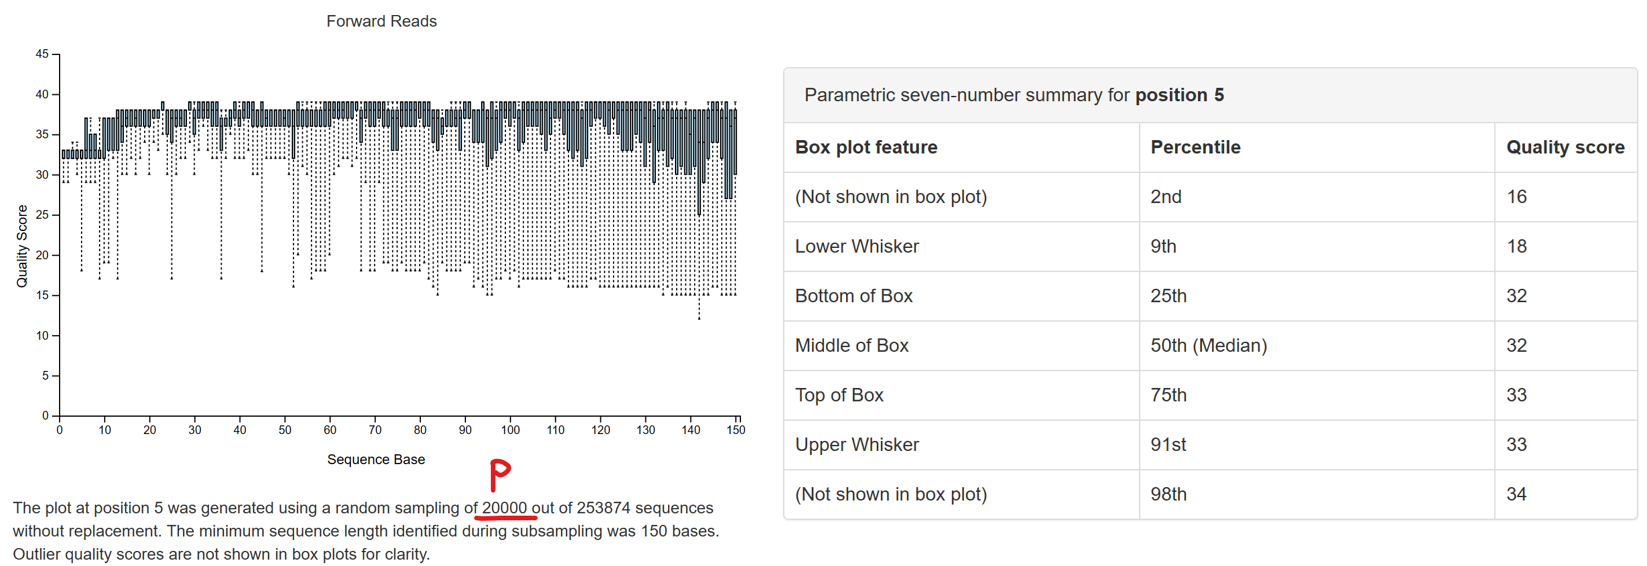

# 序列品質控制(DADA2)
序列品質控制，去除低品質序列，將使用DADA2套件，將序列進行修剪 (trimming)、過濾 (filters)、降躁 (denoises)、合併 (merge)、去除重疊 (dereplicates)。由於上圖quality plot顯示在任何position，Q value幾乎皆大於20，定序品質良好，因此保留完整序列(150 bases)。

- [DADA2品質控管方式](https://ithelp.ithome.com.tw/articles/10296865)

In [39]:
!qiime dada2 denoise-single \
--i-demultiplexed-seqs ./demux_seqs.qza \
--p-trunc-len 150 \
--p-trim-left 0 \
--o-denoising-stats ./dada2_stats.qza \
--o-table ./dada2_table.qza \
--o-representative-sequences ./dada2_rep_set.qza

Saved FeatureTable[Frequency] to: ./dada2_table.qza
Saved FeatureData[Sequence] to: ./dada2_rep_set.qza
Saved SampleData[DADA2Stats] to: ./dada2_stats.qza


經過品質控管後，將相同的序列分成一組ASV，並從各ASVs選出一條代表該群的序列(Representative sequences)，並給予一串編號稱為(Feature ID)。與傳統OTU利用序列相似性進行類聚不同的是，ASV以更高的分辨率，更準確地表示不同的微生物群落成分。
- `qiime dada2 denoise-single`: 單尾定序品質控管指令，輸出三個qza檔案；雙尾定序`qiime dada2 denoise-paired`。
- `--i-demultiplexed-seqs ...`: 輸入之ARTIFACT路徑。
- `--p-trunc-len ...`: 序列剪切後的總長度，若單一序列低於此設定長度則捨棄這一序列。
- `--p-trim-left 0 ...`: 序列起始端切多少，預設是0。
- `--o-denoising-stats ...`: 輸出檔案位置，使用dada2各個階段控制序列的簡單統計(statistics)。檢查各個控管階段有無不尋常的篩選掉大量序列，以評估是否剪切過多。
- `--o-table ...`: dada2處理後之特徵表(feature table)，包含了每個樣本中的微生物特徵（如ASVs或OTUs）的計數信息，以Feature ID表示，描述了這些特徵在不同樣本中的存在。特徵表對於後續的微生物群落分析非常重要，它可以被用來比較不同樣本之間的微生物組成，進行多樣性分析。
- `--o-representative-sequences ...`: 各個Feature ID所對應的代表序列(representative sequences)

其他詳細參數設定介紹如下:

In [47]:
!qiime dada2 denoise-single --help
# !qiime dada2 denoise-paired --help

Usage: qiime dada2 denoise-single [OPTIONS]

  This method denoises single-end sequences, dereplicates them, and filters
  chimeras.

Inputs:
  --i-demultiplexed-seqs ARTIFACT SampleData[SequencesWithQuality |
    PairedEndSequencesWithQuality]
                         The single-end demultiplexed sequences to be
                         denoised.                                  [required]
Parameters:
  --p-trunc-len INTEGER  Position at which sequences should be truncated due
                         to decrease in quality. This truncates the 3' end of
                         the of the input sequences, which will be the bases
                         that were sequenced in the last cycles. Reads that
                         are shorter than this value will be discarded. If 0
                         is provided, no truncation or length filtering will
                         be performed                               [required]
  --p-trim-left INTEGER  Position at which sequences 

將三個輸出的qza轉成qzv以視覺化。

In [48]:
!qiime metadata tabulate \
--m-input-file ./dada2_stats.qza  \
--o-visualization ./dada2_stats.qzv

Saved Visualization to: ./dada2_stats.qzv


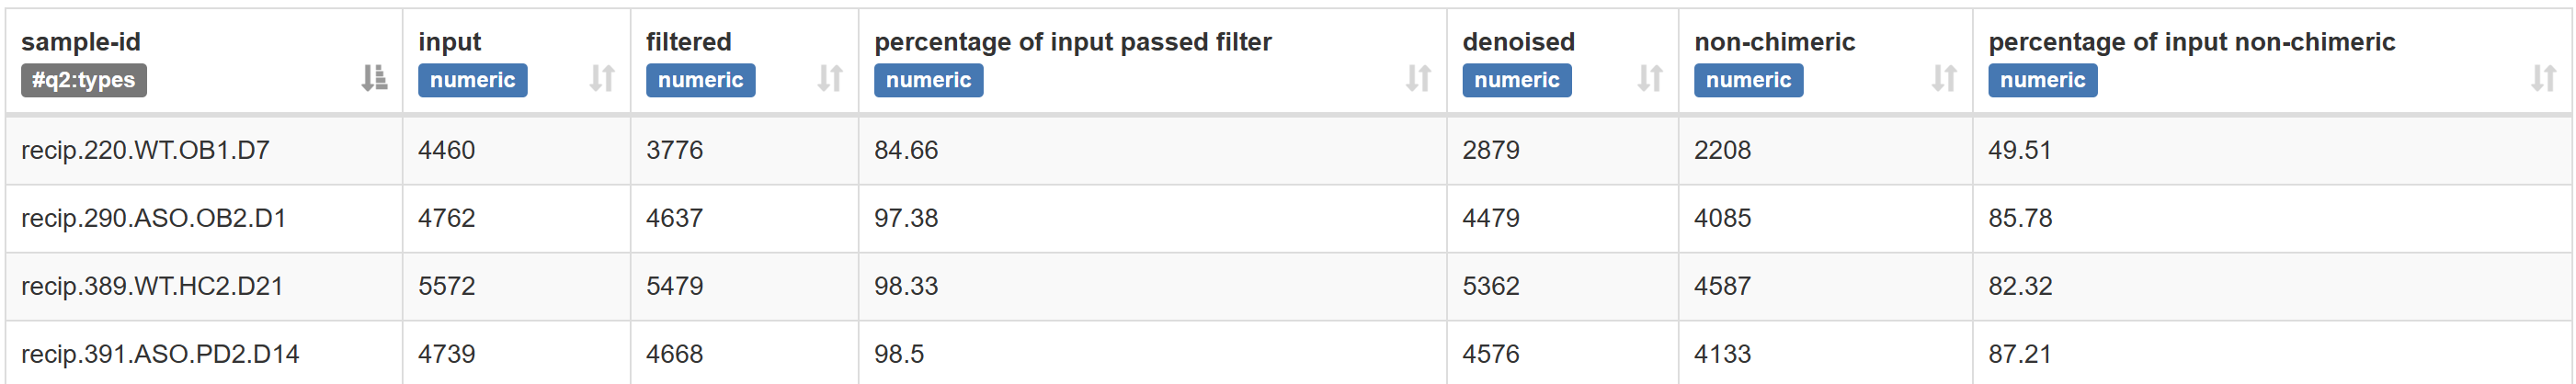

`qiime metadata tabulate ...`: 表格化統計結果。input 輸入數據；filtered 過濾後的數據；denoised 去噪後的數據；non-chimeric 去除嵌合體後的數據

In [49]:
!qiime feature-table summarize \
--i-table ./dada2_table.qza \
--m-sample-metadata-file ./metadata.tsv \
--o-visualization ./dada2_table.qzv

Saved Visualization to: ./dada2_table.qzv


顯示特徵表(feeature)的統計結果，進一步查看每個樣本的品質控管後的特徵量，和每個特徵的頻率和其在樣本中出現的次數。
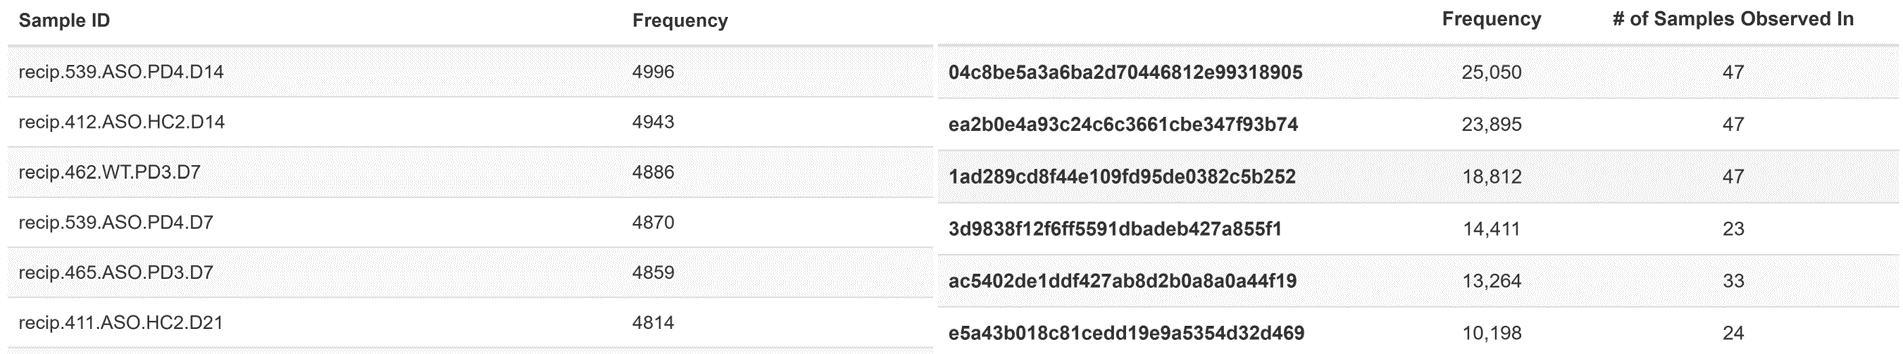

In [52]:
!qiime feature-table tabulate-seqs \
--i-data dada2_rep_set.qza \
--o-visualization dada2_rep_set.qzv

Saved Visualization to: dada2_rep_set.qzv


Feature ID之代表序列
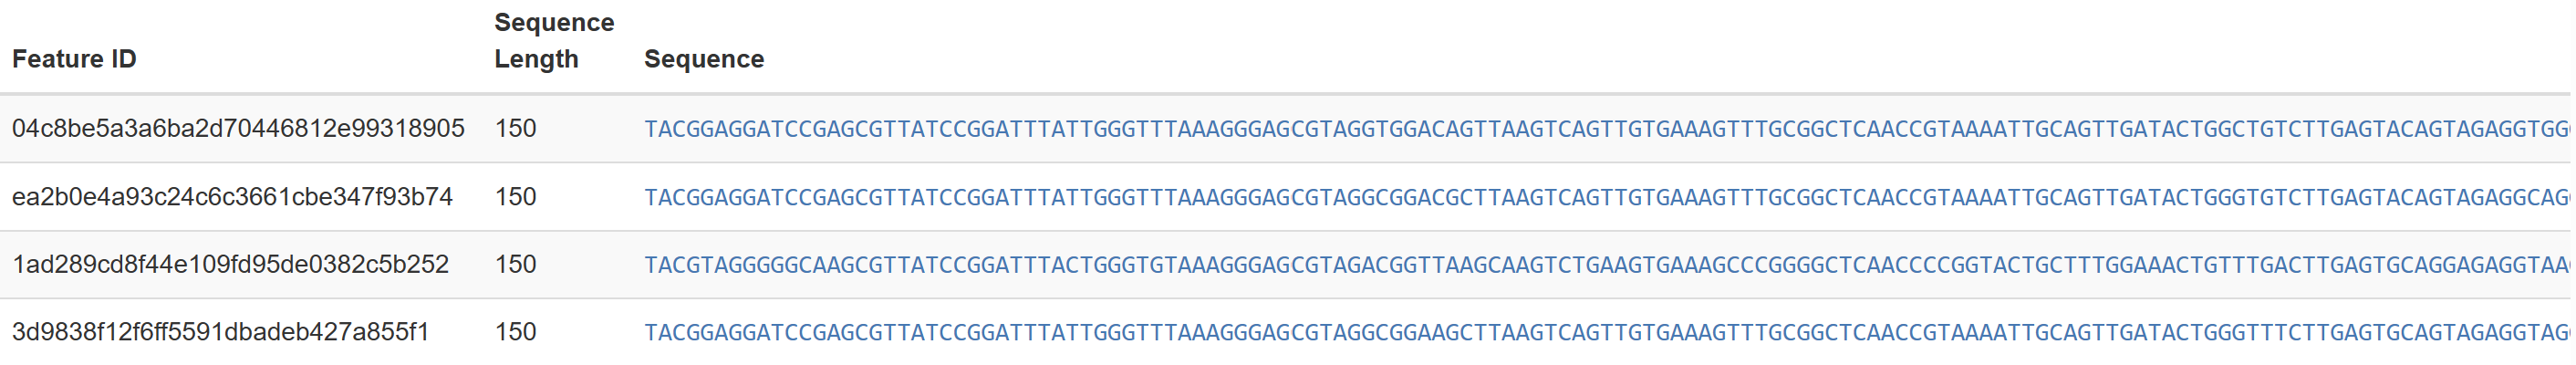

# 物種分類(Taxonomy assignment)
使用機器學習分類器進行物種分類(Taxonomy assignment):
- 分類器(classifier): 用以分類菌種之機器學習模型。
- 微生物序列資料庫(microbiota database): 用以訓練分類器之資料來源。常見的微生物資料庫，分別是 Greegenes, SILVA 和 RDP 。下圖節自: https://ithelp.ithome.com.tw/articles/10298358
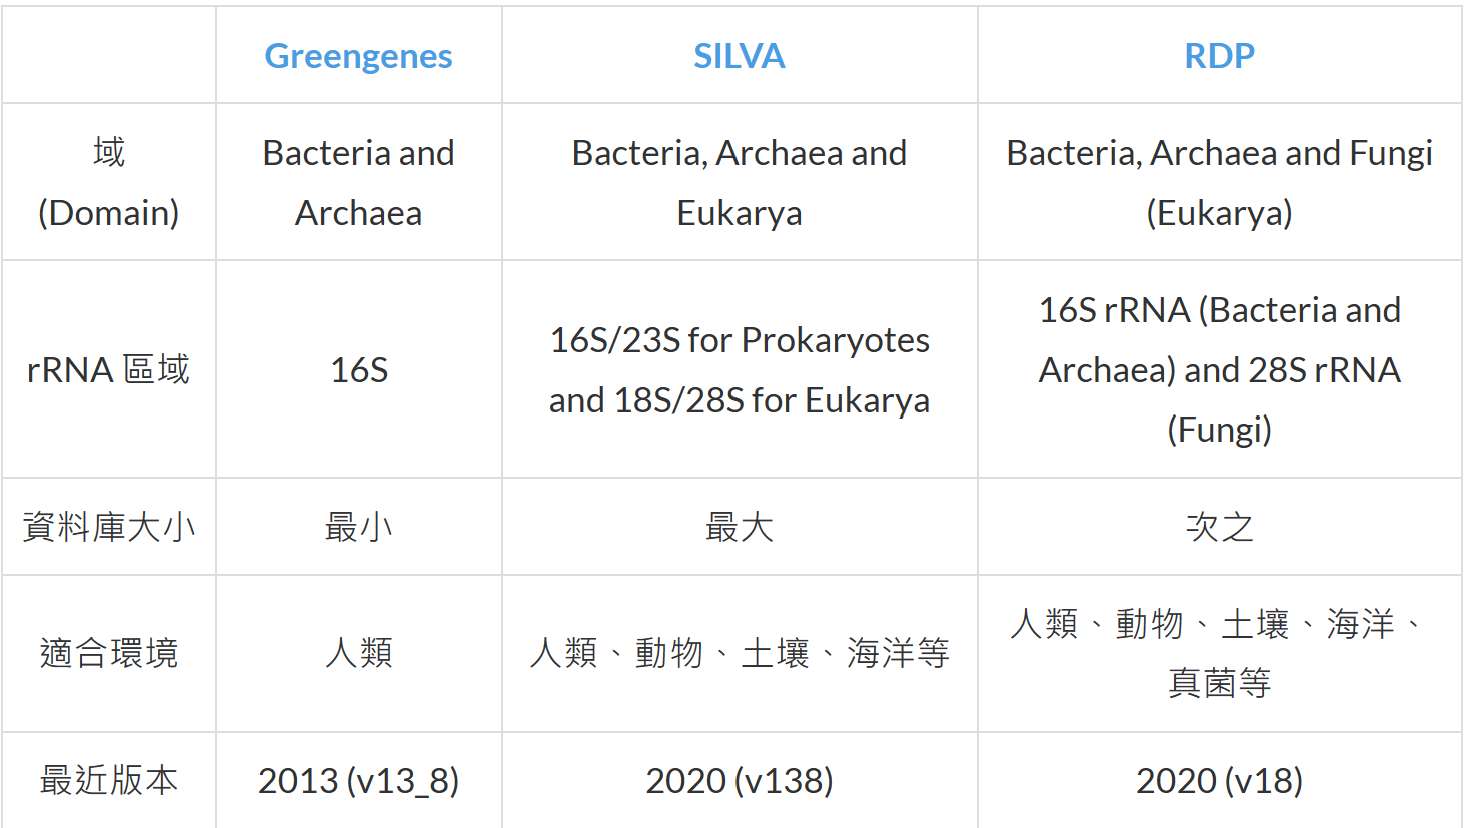
- 已訓練的分類器: 通常會有訓練好的分類器模型可直接使用。[QIIME2: Data resources](https://docs.qiime2.org/2023.5/data-resources/#taxonomy-classifiers-for-use-with-q2-feature-classifier)

本次分析之序列為16S V4，將使用qiime2提供之[Silva 138 99% OTUs from 515F/806R region of sequences](https://data.qiime2.org/2023.5/common/silva-138-99-515-806-nb-classifier.qza)分類器，透過`wget`下載分類器，並命名為`silva-V4-nb-classifier.qza`。

In [53]:
!wget \
-O "silva-V4-nb-classifier.qza" \
"https://data.qiime2.org/2023.5/common/silva-138-99-515-806-nb-classifier.qza"

--2023-08-13 16:24:45--  https://data.qiime2.org/2023.5/common/silva-138-99-515-806-nb-classifier.qza
Resolving lgn304-v304 (lgn304-v304)... 172.17.26.4
Connecting to lgn304-v304 (lgn304-v304)|172.17.26.4|:53128... connected.
Proxy request sent, awaiting response... 302 FOUND
Location: https://s3-us-west-2.amazonaws.com/qiime2-data/2023.5/common/silva-138-99-515-806-nb-classifier.qza [following]
--2023-08-13 16:24:46--  https://s3-us-west-2.amazonaws.com/qiime2-data/2023.5/common/silva-138-99-515-806-nb-classifier.qza
Connecting to lgn304-v304 (lgn304-v304)|172.17.26.4|:53128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 148294965 (141M) [binary/octet-stream]
Saving to: 'silva-V4-nb-classifier.qza'

silva-V4-nb-classif 100%[===================>] 141.42M  20.5MB/s    in 24s     

2023-08-13 16:25:10 (6.00 MB/s) - 'silva-V4-nb-classifier.qza' saved [148294965/148294965]



In [54]:
!qiime feature-classifier classify-sklearn \
--i-classifier silva-V4-nb-classifier.qza \
--i-reads dada2_rep_set.qza \
--o-classification taxonomy.qza

Saved FeatureData[Taxonomy] to: taxonomy.qza


- `qiime feature-classifier classify-sklearn`: 透過分類器對representive sequences進行分類之指令。
- `--i-classifier ...`: 分類器檔案位置。
- `--i-reads ...`: representive sequences之檔案位置。
- `--o-classification ...`: 輸出結果taxonomy.qza。

其他可調整參數如下，除上述以外都用預設的即可。

In [57]:
!qiime feature-classifier classify-sklearn --help

Usage: qiime feature-classifier classify-sklearn [OPTIONS]

  Classify reads by taxon using a fitted classifier.

Inputs:
  --i-reads ARTIFACT FeatureData[Sequence]
                         The feature data to be classified.         [required]
  --i-classifier ARTIFACT
    TaxonomicClassifier  The taxonomic classifier for classifying the reads.
                                                                    [required]
Parameters:
  --p-reads-per-batch VALUE Int % Range(1, None) | Str % Choices('auto')
                         Number of reads to process in each batch. If "auto",
                         this parameter is autoscaled to min( number of query
                         sequences / n-jobs, 20000).         [default: 'auto']
  --p-n-jobs INTEGER     The maximum number of concurrently worker processes.
                         If -1 all CPUs are used. If 1 is given, no parallel
                         computing code is used at all, which is useful for
                       

將分類結果比格化輸出，同樣上傳至[qiime2 view](https://view.qiime2.org/)察看結果。

In [60]:
!qiime metadata tabulate \
--m-input-file taxonomy.qza \
--o-visualization taxonomy.qzv

Saved Visualization to: taxonomy.qzv


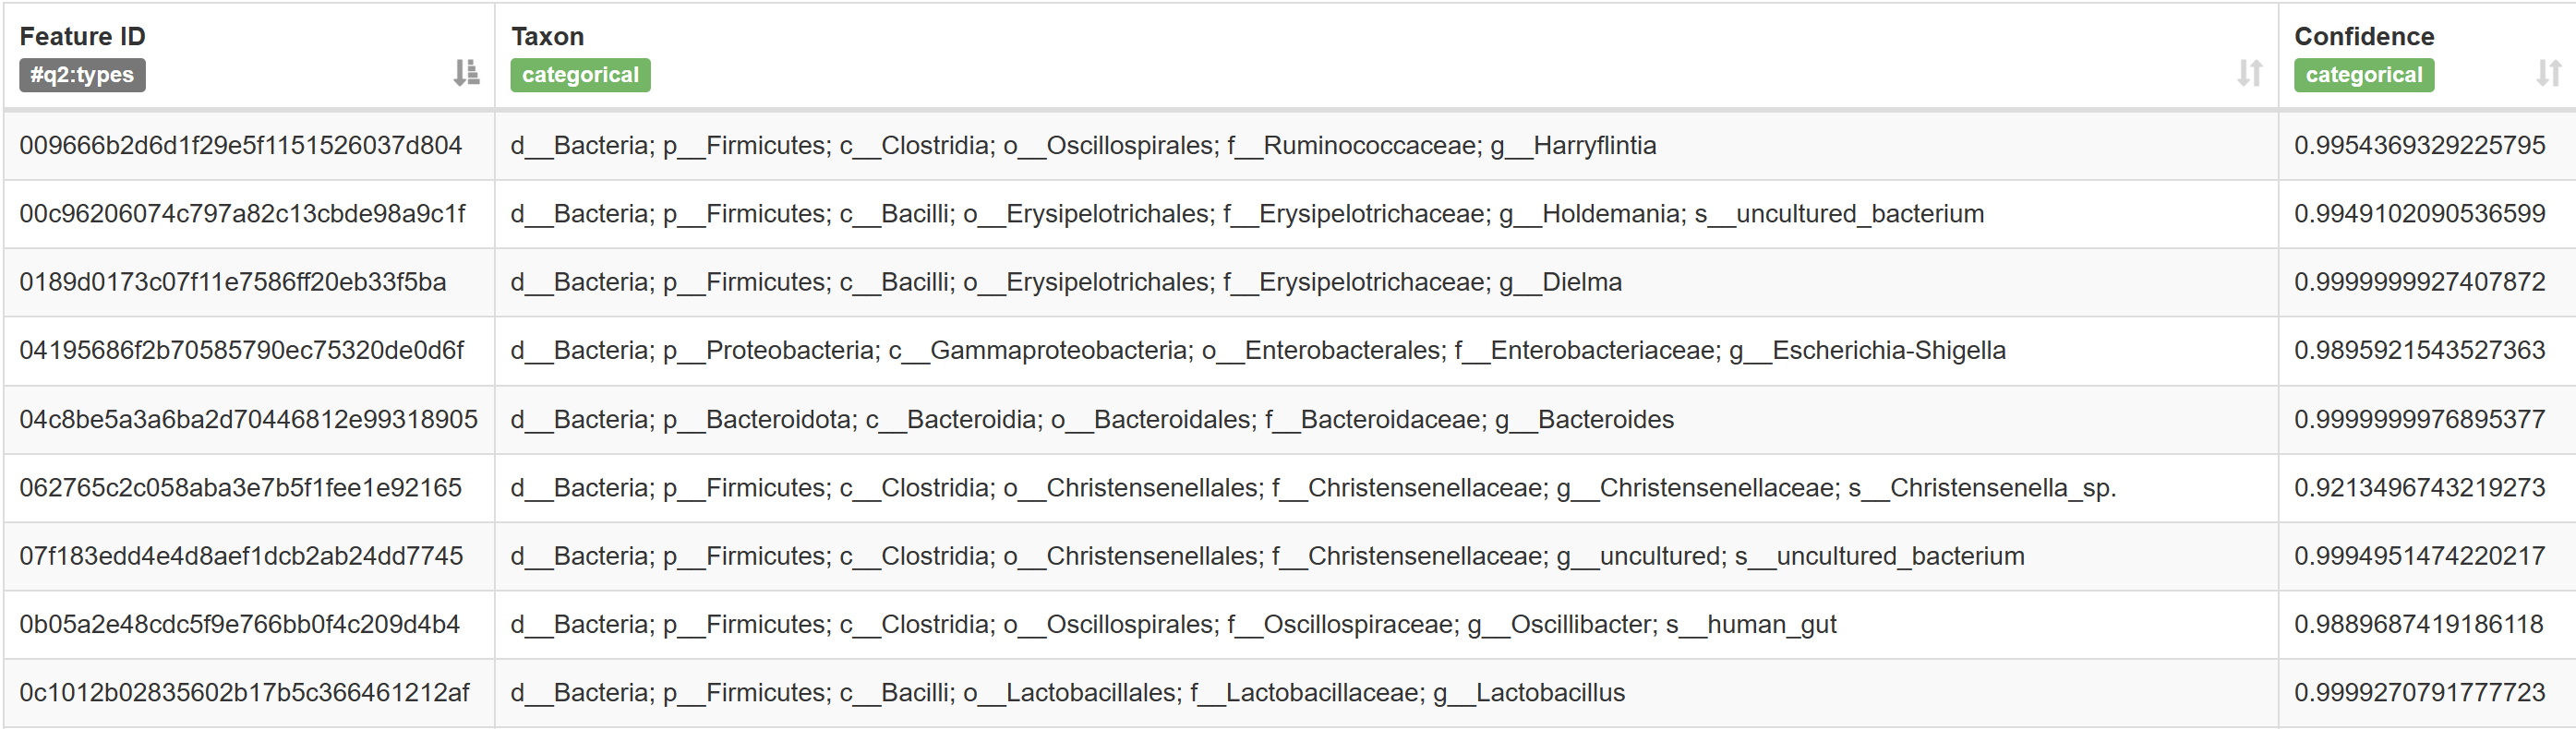
Taxon 呈現各階層的分類結果 (界d 門p 綱c 目o 科f 屬g 種s)，若是出現許多顯示 Unassigned 或多數無法到 G (Genus) / S (Species)，
就要考慮分類器是否合適。由於使用16S V4定序，片段較短，許多分類結果只能達到G階層。

# 分類柱狀圖

In [63]:
!qiime taxa barplot \
--i-table dada2_table.qza \
--i-taxonomy taxonomy.qza \
--m-metadata-file metadata.tsv \
--o-visualization taxa-bar-plots.qzv

Saved Visualization to: taxa-bar-plots.qzv


- `qiime taxa barplot`: 繪製分類柱狀圖指令
- `--i-table ...`: 輸入之feature table qza檔案位置
- `--i-taxonomy ...`: 輸入之taxonomy.qza檔案位置
- `--m-metadata-file ...`: 輸入之metadata位置
- `--o-visualization ...`: 輸出之taxa-bar-plots.qzv位置

其他詳細介紹如下:

In [64]:
!qiime taxa barplot --help

Usage: qiime taxa barplot [OPTIONS]

  This visualizer produces an interactive barplot visualization of taxonomies.
  Interactive features include multi-level sorting, plot recoloring, sample
  relabeling, and SVG figure export.

Inputs:
  --i-table ARTIFACT FeatureTable[Frequency | PresenceAbsence]
                         Feature table to visualize at various taxonomic
                         levels.                                    [required]
  --i-taxonomy ARTIFACT FeatureData[Taxonomy]
                         Taxonomic annotations for features in the provided
                         feature table. All features in the feature table must
                         have a corresponding taxonomic annotation. Taxonomic
                         annotations that are not present in the feature table
                         will be ignored. If no taxonomy is provided, the
                         feature IDs will be used as labels.        [optional]
Parameters:
  --m-metadata-file META

分類柱狀圖之qiime2 view顯示結果:
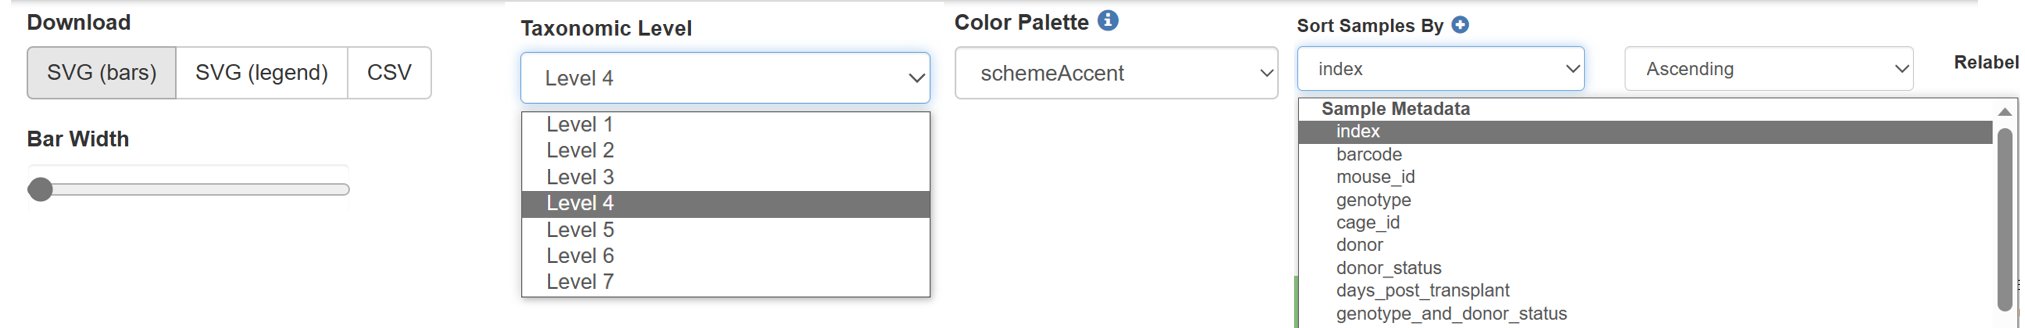
- **Download**可選擇資料之下載方式，圖片(柱狀圖bar or 資料標籤legand)或是csv(儲存不同樣本之metadata及在特定分類層級下，各微生物出現頻率)。
- **Bar Width**可調整每個bar的寬度。
- **Taxomic Level**可選擇繪製之分類層級(界1 門2 綱3 目4 科5 屬6 種7)。
- **Color Palette**可選擇bar繪製顏色。
- **Sort Sample By**可選擇樣本依照metadata分類之排序依據。
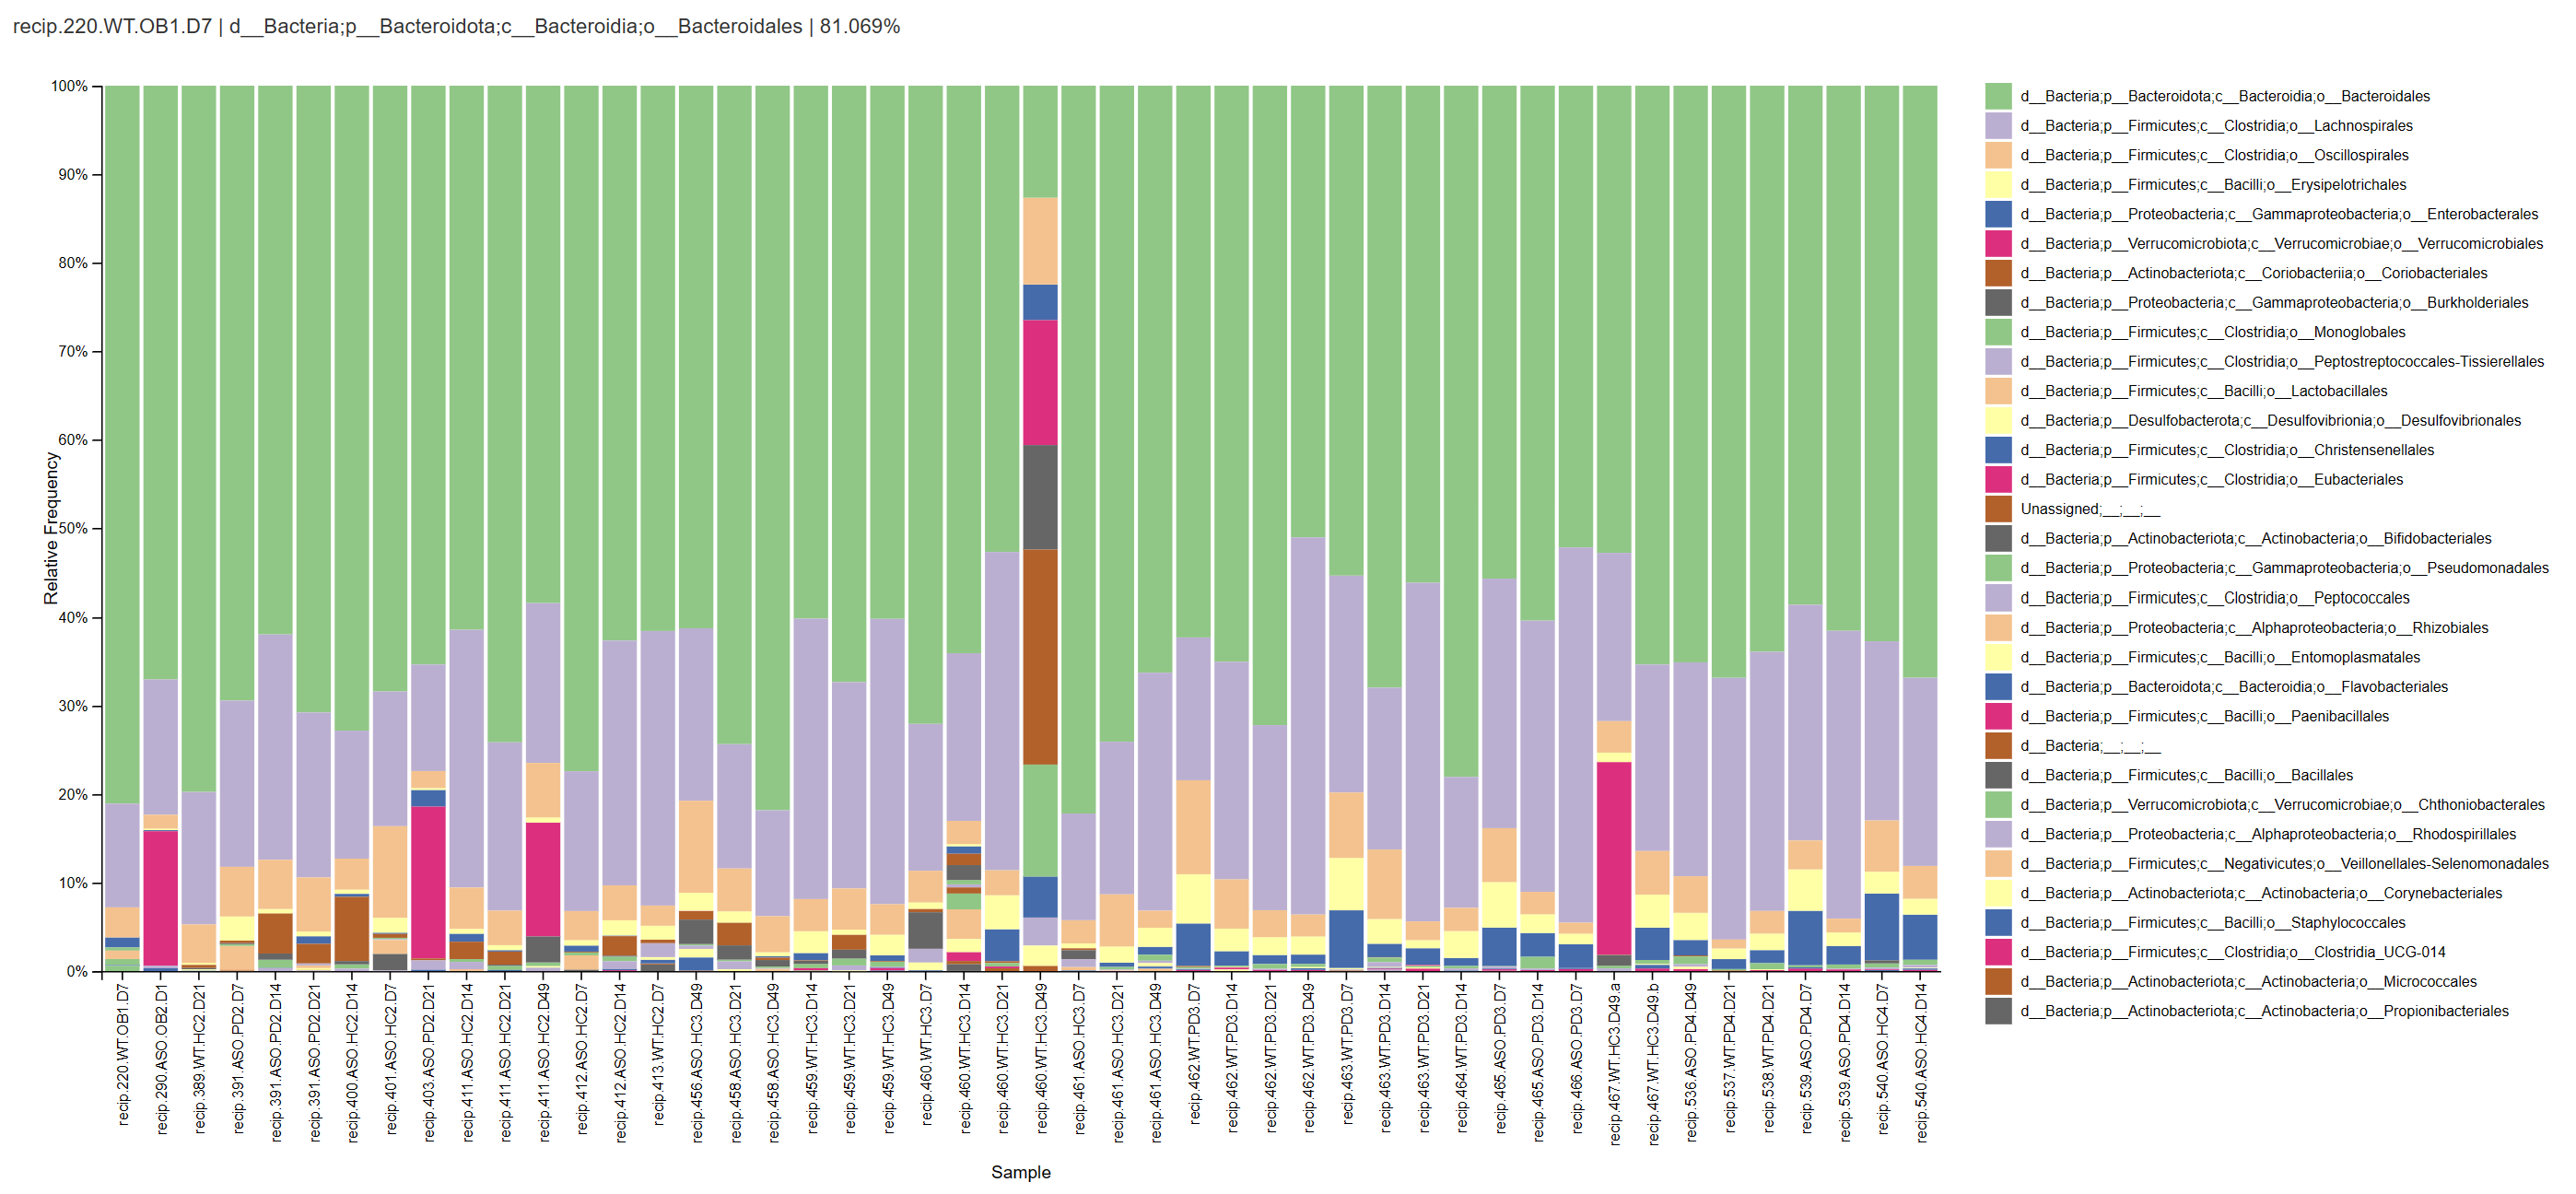
不同樣本之分類柱狀圖，顯示不同樣本之微生物相對頻率(Relative Frequency)，也可以想成是微生物於樣本中之相對豐度(Relative Abundence)。顏色代表微生物分類，分類層級將依照使用者自行選擇進行繪製(這邊是選擇level 4 目)，鼠標移動至柱狀圖上將顯示詳細微生物在樣本中佔比於圖片左上角。

# 互動式動態分類圓餅圖(korna)
將使用korna套件繪製圓餅圖，需另外透過conda安裝`krona`，若是使用HMP_env Kernal則皆已安裝完畢。
```
conda install -c bioconda krona
```

In [67]:
!qiime krona collapse-and-plot \
--i-table dada2_table.qza \
--i-taxonomy taxonomy.qza \
--o-krona-plot krona.qzv

Saved Visualization to: krona.qzv


- `qiime krona collapse-and-plot`: 繪製動態分類圓餅圖指令
- `--i-table ...`: 輸入之feature table qza檔案位置
- `--i-taxonomy ...`: 輸入之taxonomy.qza檔案位置
- `--o-krona-plot ...`: 輸出之krona.qzv位置

其他詳細介紹如下:

In [68]:
!qiime krona collapse-and-plot --help

Usage: qiime krona collapse-and-plot [OPTIONS]

  Generate Krona plot from feature table by collapsing to specified level.

Inputs:
  --i-table ARTIFACT FeatureTable[Frequency]
                          Feature table containing the frequencies. [required]
  --i-taxonomy ARTIFACT FeatureData[Taxonomy]
                                                                    [required]
Parameters:
  --p-level INTEGER       The taxonomic level at which the features should be
                          collapsed.                              [default: 7]
  --p-delimiter TEXT      Delimiter character used in taxonomy file.
                                                                [default: ';']
Outputs:
  --o-krona-plot VISUALIZATION
                          Visualizer of Krona plots.                [required]
Miscellaneous:
  --output-dir PATH       Output unspecified results to a directory
  --verbose / --quiet     Display verbose output to stdout and/or stderr
                          d

將krona.qzv上傳至[Qiime2 view](https://view.qiime2.org/)
圓餅圖表示單一樣本中微生物在不同階層之分布，可以透過鼠標按住並滑動來觀察特定分類階層下的詳細分類。最內層代表界層級之分類，最外圍則為種層級之分類(根據taxonamy之分類解析度，最外層不一定是種)。
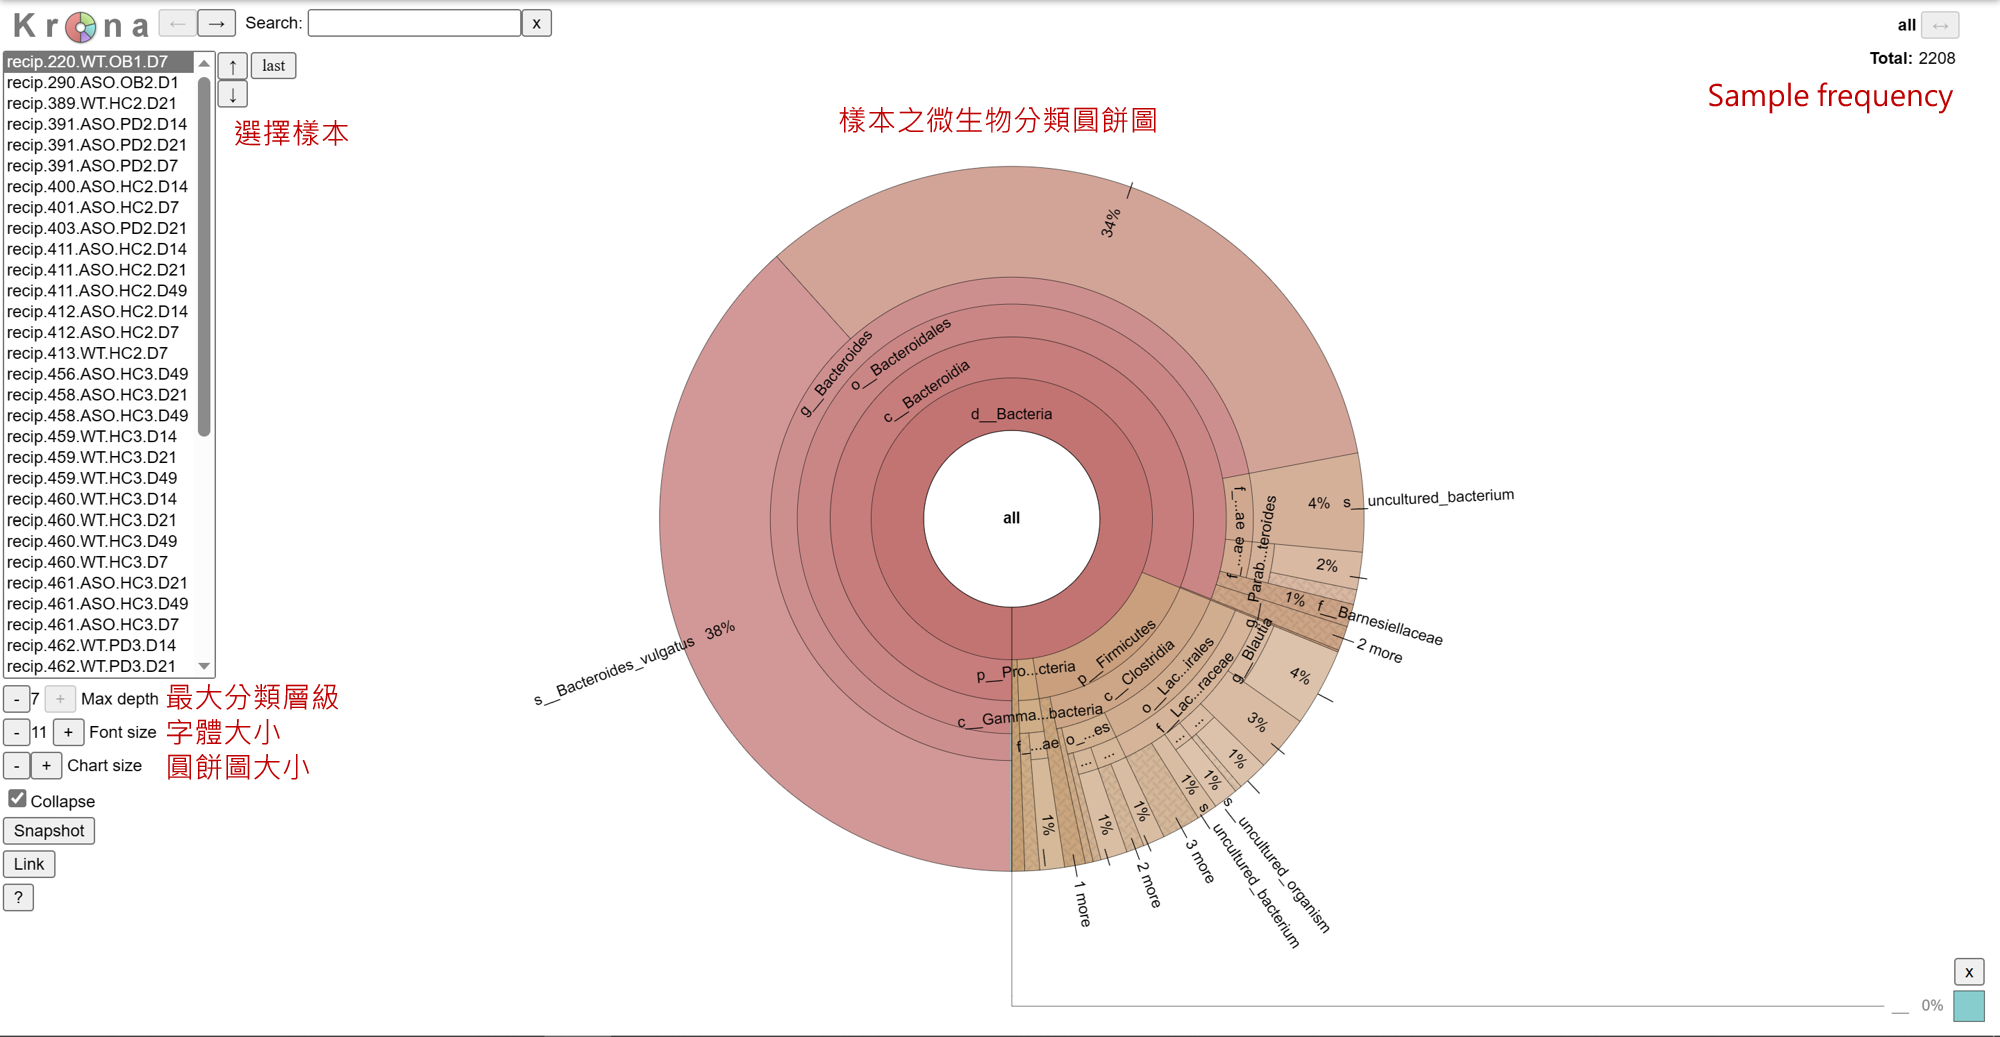

# 繪製熱圖


# 繪製親緣樹(phylogenetic tree)
可分為**rooted tree**以及**unrooted tree**，兩者最大差別是在，有根樹之所有物種起源皆自同一個點，可看出演化方向性，適合應用在觀察演化過程與不同物種之演化關係。無根樹則無定義出演化的方向與路徑，著重在分類群之間的關係。繪製親緣樹之目的除了可供視覺化參考外，後續多樣性分析時，部分指標會需要用到rooted tree來考慮菌種間之親緣關係(如:  Faith’s Phylogenetic Diversity和UniFrac distance)

樹的製作主要可分為兩種方法:
- [**fragment-insertion**](https://docs.qiime2.org/2023.5/tutorials/pd-mice/#generating-a-phylogenetic-tree-for-diversity-analysis): 將representative sequences依照序列插入已知之參考親緣樹中，需要處理未分類序列的插入，這可能需要更多的計算和時間成本。
- [**align-to-tree**](https://docs.qiime2.org/2022.8/tutorials/moving-pictures/#generate-a-tree-for-phylogenetic-diversity-analyses): 將序列進行alignment，接著透過遮罩（masks ），去除高度變異的位置，最後使用特定方法繪製親緣樹，這裡所使用的是`FastTree `。

qiime2官方教學文件解釋，通過將序列alignment至由較大序列構建之參考樹，fragment-insertion在對短片段 Illumina 序列進行親緣樹繪製時可能會比傳統的基於序列比對的方法表現更好，雖然這可能會花費更多的計算資源。若您是使用國網HPC環境進行操作，不必特別擔心計算資源的問題，因此這邊將使用fragment-insertion方法繪製親緣樹(將輸出rooted tree)。

首先透過`wget`下載參考樹。

In [72]:
!wget \
-O "sepp-refs-gg-13-8.qza" \
"https://data.qiime2.org/2023.5/common/sepp-refs-gg-13-8.qza"

--2023-08-14 09:54:59--  https://data.qiime2.org/2023.5/common/sepp-refs-gg-13-8.qza
Resolving lgn304-v304 (lgn304-v304)... 172.17.26.4
Connecting to lgn304-v304 (lgn304-v304)|172.17.26.4|:53128... connected.
Proxy request sent, awaiting response... 302 FOUND
Location: https://s3-us-west-2.amazonaws.com/qiime2-data/2023.5/common/sepp-refs-gg-13-8.qza [following]
--2023-08-14 09:55:00--  https://s3-us-west-2.amazonaws.com/qiime2-data/2023.5/common/sepp-refs-gg-13-8.qza
Connecting to lgn304-v304 (lgn304-v304)|172.17.26.4|:53128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 50161069 (48M) [binary/octet-stream]
Saving to: 'sepp-refs-gg-13-8.qza'

sepp-refs-gg-13-8.q 100%[===================>]  47.84M  14.4MB/s    in 3.5s    

2023-08-14 09:55:04 (13.7 MB/s) - 'sepp-refs-gg-13-8.qza' saved [50161069/50161069]



In [71]:
!nproc

18


In [75]:
!qiime fragment-insertion sepp \
--i-representative-sequences ./dada2_rep_set.qza \
--i-reference-database sepp-refs-gg-13-8.qza \
--o-tree ./rooted_tree.qza \
--o-placements ./tree_placements.qza \
--p-threads 18

Saved Phylogeny[Rooted] to: ./rooted_tree.qza
Saved Placements to: ./tree_placements.qza


可將其繪製好之親緣樹同其他qza如taxonomy.qza, dada2_rep_set.qza, dada2_table.qza上傳至[iTOL](https://itol.embl.de/upload.cgi)視覺化觀察。

[中文iTOL詳細使用介紹](https://ithelp.ithome.com.tw/articles/10300082)，[iTOL官方使用教學影片](https://itol.embl.de/video_tutorial.cgi#)
- `qiime fragment-insertion sepp`: 透過sepp方法進行fragment-insertion之指令
- `--i-representative-sequences ...`: 輸入之representative sequences qza檔案位置
- `--i-reference-database ...`: 輸入之參考樹位置
- `--o-tree ...`: 輸出之tree位置及名稱
- `--o-placements ...`: 輸出插入結果之文件。
- `--p-threads ...`: 使用之CPU核心數量，可透過`nproc`查詢最大CPU可使用量。

詳細指令使用方法如下:

In [70]:
!qiime fragment-insertion sepp --help

Usage: qiime fragment-insertion sepp [OPTIONS]

  Perform fragment insertion of sequences using the SEPP algorithm.

Inputs:
  --i-representative-sequences ARTIFACT FeatureData[Sequence]
                       The sequences to insert into the reference tree.
                                                                    [required]
  --i-reference-database ARTIFACT SeppReferenceDatabase
                       The reference database to insert the representative
                       sequences into.                              [required]
Parameters:
  --p-alignment-subset-size INTEGER
                       Each placement subset is further broken into subsets
                       of at most these many sequences and a separate HMM is
                       trained on each subset.                 [default: 1000]
  --p-placement-subset-size INTEGER
                       The tree is divided into subsets such that each subset
                       includes at most these many subsets

# Alpha多樣性之稀疏曲線(rarefaction curve)繪製
有了各樣本之ASVs資訊(feature table)和各ASVs間的親緣關係(phylogenetic tree)，那可以準備進行多樣性分析了。不過考慮到不同樣本的測序深度不一樣，進行多樣性分析前，需先對各樣本進行正規化(normalization)，方能比較不同樣本之間多樣性之差異，這邊將透過繪製**稀疏曲線(rarefaction curve)**，來選擇各樣本進行後續多樣性分析之**取樣深度(Sampling Depth)進行標準化。**

多樣性分析分為alpha多樣性以及beta多樣性，[alpha多樣性](https://highscope.ch.ntu.edu.tw/wordpress/?p=63470)其計算結果**反映的是單一樣本(或一組樣本)內之多樣性**，不涉及個體間的比較，如物種豐富度richness、物種均勻度evenness等；而[Beta多樣性](https://summer-inequality.blogspot.com/2019/02/beta-diversity.html)分析，則是屬於組間比較(計算兩組之間菌種分布差異程度)，如bray curtis、jaccard、unifrac等。

In [81]:
!qiime diversity alpha-rarefaction \
--i-table ./dada2_table.qza \
--i-phylogeny rooted_tree.qza \
--m-metadata-file ./metadata.tsv \
--o-visualization ./alpha_rarefaction_curves.qzv \
--p-min-depth 1 \
--p-max-depth 4996

Saved Visualization to: ./alpha_rarefaction_curves.qzv


- `qiime diversity alpha-rarefaction`: 繪製alpha rarefaction之指令。
- `--i-table ...`: 輸入之feature table qza檔案位置。
- `--i-phylogeny ...`: 輸入之rooted tree qza檔案位置，有輸入親緣樹才能計算Faith’s Phylogenetic Diversity。
- `--m-metadata-file ...`: 輸入之metadata之位置。
- `--o-visualization ...`: 輸出之qzv結果位置。
- `--p-min-depth ...`: 繪製稀疏曲線之最小測序深度，預設為1。
- `--p-max-depth ...`: 繪製稀疏曲線之最大測序深度，可以查看feature table qzv設定樣本之最大測序深度(此範例為4996)。

In [76]:
!qiime diversity alpha-rarefaction --help

Usage: qiime diversity alpha-rarefaction [OPTIONS]

  Generate interactive alpha rarefaction curves by computing rarefactions
  between `min_depth` and `max_depth`. The number of intermediate depths to
  compute is controlled by the `steps` parameter, with n `iterations` being
  computed at each rarefaction depth. If sample metadata is provided, samples
  may be grouped based on distinct values within a metadata column.

Inputs:
  --i-table ARTIFACT FeatureTable[Frequency]
                          Feature table to compute rarefaction curves from.
                                                                    [required]
  --i-phylogeny ARTIFACT  Optional phylogeny for phylogenetic metrics.
    Phylogeny[Rooted]                                               [optional]
Parameters:
  --p-max-depth INTEGER   The maximum rarefaction depth. Must be greater than
    Range(1, None)        min-depth.                                [required]
  --p-metrics TEXT... Choices('ace', 'berger_par

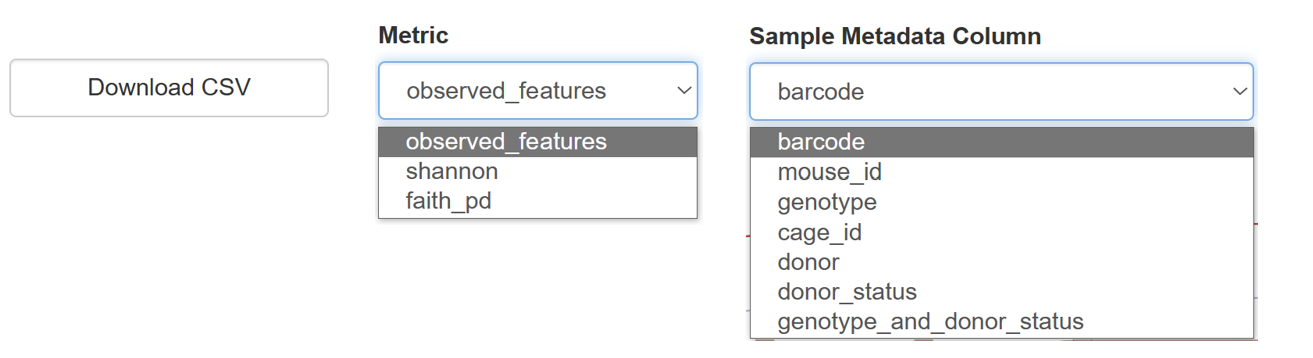
- **Metrix**: 可以選擇顯示之Alpha多樣性指標，樣本中**觀察到物種數量observed_features**在特定採樣深度下，觀察到的AVSs數量；**香農多樣性指數shannon和系統發育多樣性faith_pd**，皆為多樣性指數，計算時考量到樣本之物種豐富度(Richness)以及均勻度(evenness)，差別在於計算faith_pd時有考慮到物種間親緣關係(phylogenetic tree)。
- **Sample Metadata Column**: 繪製稀疏曲線樣本分組方式。
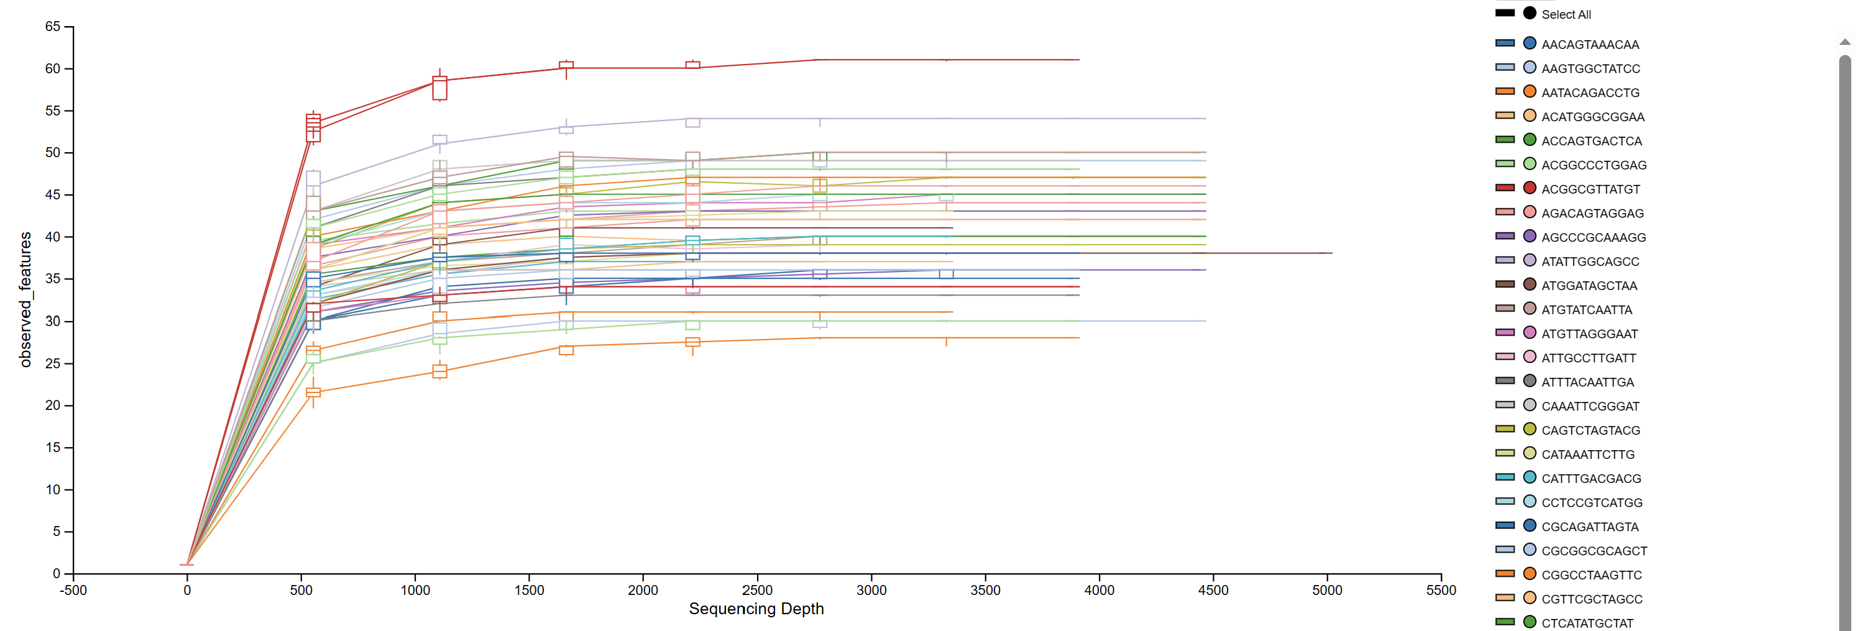
**圖一:**
- **X軸**: 採樣深度(Sampling Depth)
- **Y軸**: 多樣性指標。
透過稀疏曲線可以確認樣本中的序列數是否足夠代表整個樣本。取樣深度代表每一輪無放回抽樣時所取出的菌種觀察值數量，隨著採樣深度提高，Y軸之多樣性指標也趨於飽和（即斜率接近於零），即可以推論樣本中的序列數足夠代表整個樣本。
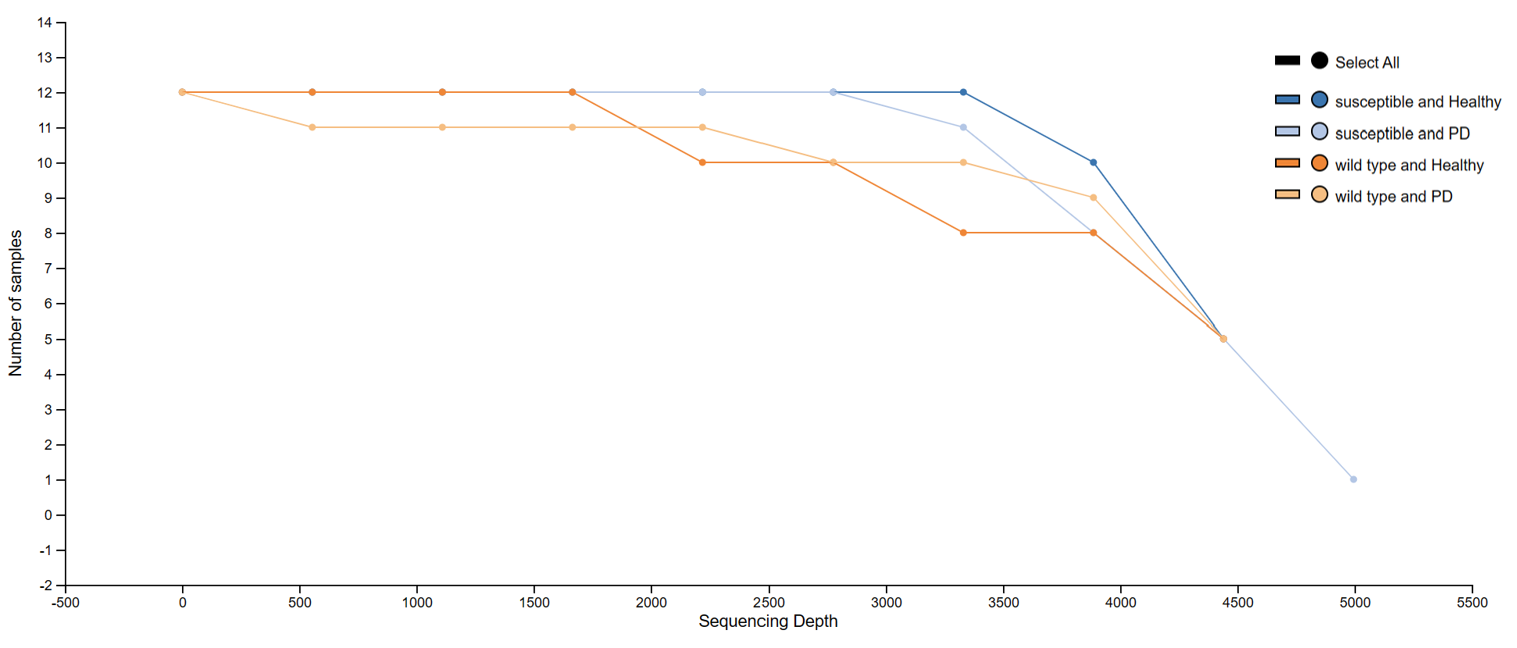
**圖二:**
顯示了每個取樣深度下每個分組的樣本數。這有助於確定樣本損失的取樣深度。

**選擇稀釋深度是在最小化序列損失(圖二觀察樣本損失量)的同時，最大化保留用於多樣性分析的序列(圖一確定取樣深度是否足以代表整個樣本)。**我們將使用每個樣本2000個序列的取樣深度進行分析。

In [82]:
!qiime diversity core-metrics-phylogenetic \
--i-table ./dada2_table.qza \
--i-phylogeny ./rooted_tree.qza \
--m-metadata-file ./metadata.tsv \
--p-sampling-depth 2000 \
--output-dir ./core-metrics-results

Saved FeatureTable[Frequency] to: ./core-metrics-results/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: ./core-metrics-results/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: ./core-metrics-results/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: ./core-metrics-results/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: ./core-metrics-results/evenness_vector.qza
Saved DistanceMatrix to: ./core-metrics-results/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: ./core-metrics-results/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: ./core-metrics-results/jaccard_distance_matrix.qza
Saved DistanceMatrix to: ./core-metrics-results/bray_curtis_distance_matrix.qza
Saved PCoAResults to: ./core-metrics-results/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: ./core-metrics-results/weighted_unifrac_pcoa_results.qza
Saved PCoAResults to: ./core-metrics-results/jaccard_pcoa_results.qza
Saved PCoAResults to: ./core-metrics-r

- `qiime diversity core-metrics-phylogenetic`: 繪製alpha rarefaction之指令。
- `--i-table ...`: 輸入之feature table qza檔案位置。
- `--i-phylogeny ...`: 輸入之rooted tree qza檔案位置，有輸入親緣樹才能計算Faith’s Phylogenetic Diversity。
- `--m-metadata-file ...`: 輸入之metadata之位置。
- `--p-sampling-depth ...`: 取樣深度。
- `--output-dir ...`: 將所有結果輸出成一個資料夾。

輸出結果:
- Alpha diversity:
    1. Observed Features
    2. Shannon’s diversity index
    3. Faith’s phylogenetic diversity
    以上三種Alpha diversity的視覺化需另外再輸入指令。
- Beta diversity:
    1. Jaccard: 只比較兩群集共有物種的數量(richness)。
    2. Bray-Curtis: 考量物種組成(richness)也採計了各物種的數量(abundence)。
    3. UniFrac: 特定群集在系統發生樹上獨佔節點的比率，是評估群集間物種親緣關係的多樣性指標，又分為weighted和unweighted，對應是否採計族群規模進行加權。
    
    以上三種Beta diversity指標的視覺化結果可分為distance和pcoa(以emperor呈現)。

In [87]:
!qiime diversity core-metrics-phylogenetic --help

Usage: qiime diversity core-metrics-phylogenetic [OPTIONS]

  Applies a collection of diversity metrics (both phylogenetic and non-
  phylogenetic) to a feature table.

Inputs:
  --i-table ARTIFACT FeatureTable[Frequency]
                          The feature table containing the samples over which
                          diversity metrics should be computed.     [required]
  --i-phylogeny ARTIFACT  Phylogenetic tree containing tip identifiers that
    Phylogeny[Rooted]     correspond to the feature identifiers in the table.
                          This tree can contain tip ids that are not present
                          in the table, but all feature ids in the table must
                          be present in this tree.                  [required]
Parameters:
  --p-sampling-depth INTEGER
    Range(1, None)        The total frequency that each sample should be
                          rarefied to prior to computing diversity metrics.
                                           

# 視覺化Alpha Diversity和Beta diversity

In [84]:
# alpha diversity
!qiime diversity alpha-group-significance \
--i-alpha-diversity ./core-metrics-results/faith_pd_vector.qza \
--m-metadata-file ./metadata.tsv \
--o-visualization ./core-metrics-results/faiths_pd_statistics.qzv

Saved Visualization to: ./core-metrics-results/faiths_pd_statistics.qzv


- `qiime diversity alpha-group-significance`: 視覺化alpha多樣性之指令。
- `--i-alpha-diversity ...`: 輸入之alpha多樣性檔案位置。
- `--m-metadata-file ...`: 輸入之metadata之位置。
- `--o-visualization ...`: 輸出檔案位置。

In [89]:
!qiime diversity alpha-group-significance --help

Usage: qiime diversity alpha-group-significance [OPTIONS]

  Visually and statistically compare groups of alpha diversity values.

Inputs:
  --i-alpha-diversity ARTIFACT SampleData[AlphaDiversity]
                       Vector of alpha diversity values by sample.  [required]
Parameters:
  --m-metadata-file METADATA...
    (multiple          The sample metadata.
     arguments will    
     be merged)                                                     [required]
Outputs:
  --o-visualization VISUALIZATION
                                                                    [required]
Miscellaneous:
  --output-dir PATH    Output unspecified results to a directory
  --verbose / --quiet  Display verbose output to stdout and/or stderr during
                       execution of this action. Or silence output if
                       execution is successful (silence is golden).
  --example-data PATH  Write example data and exit.
  --citations          Show citations and exit.
  --help        

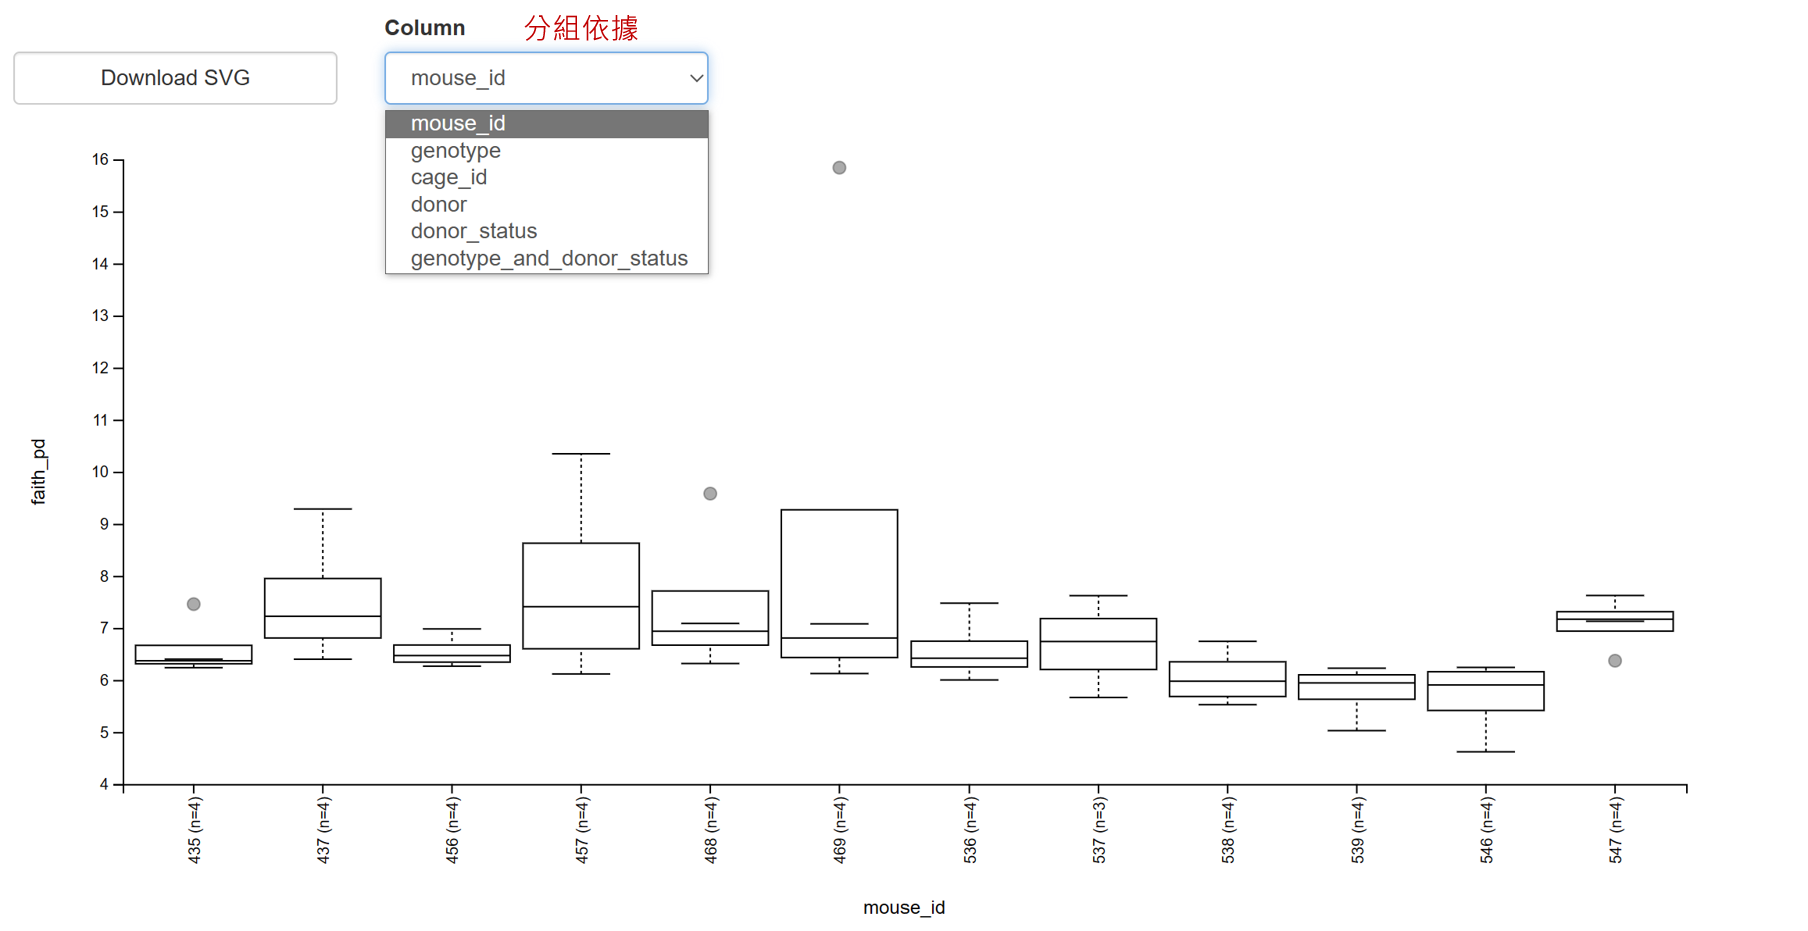
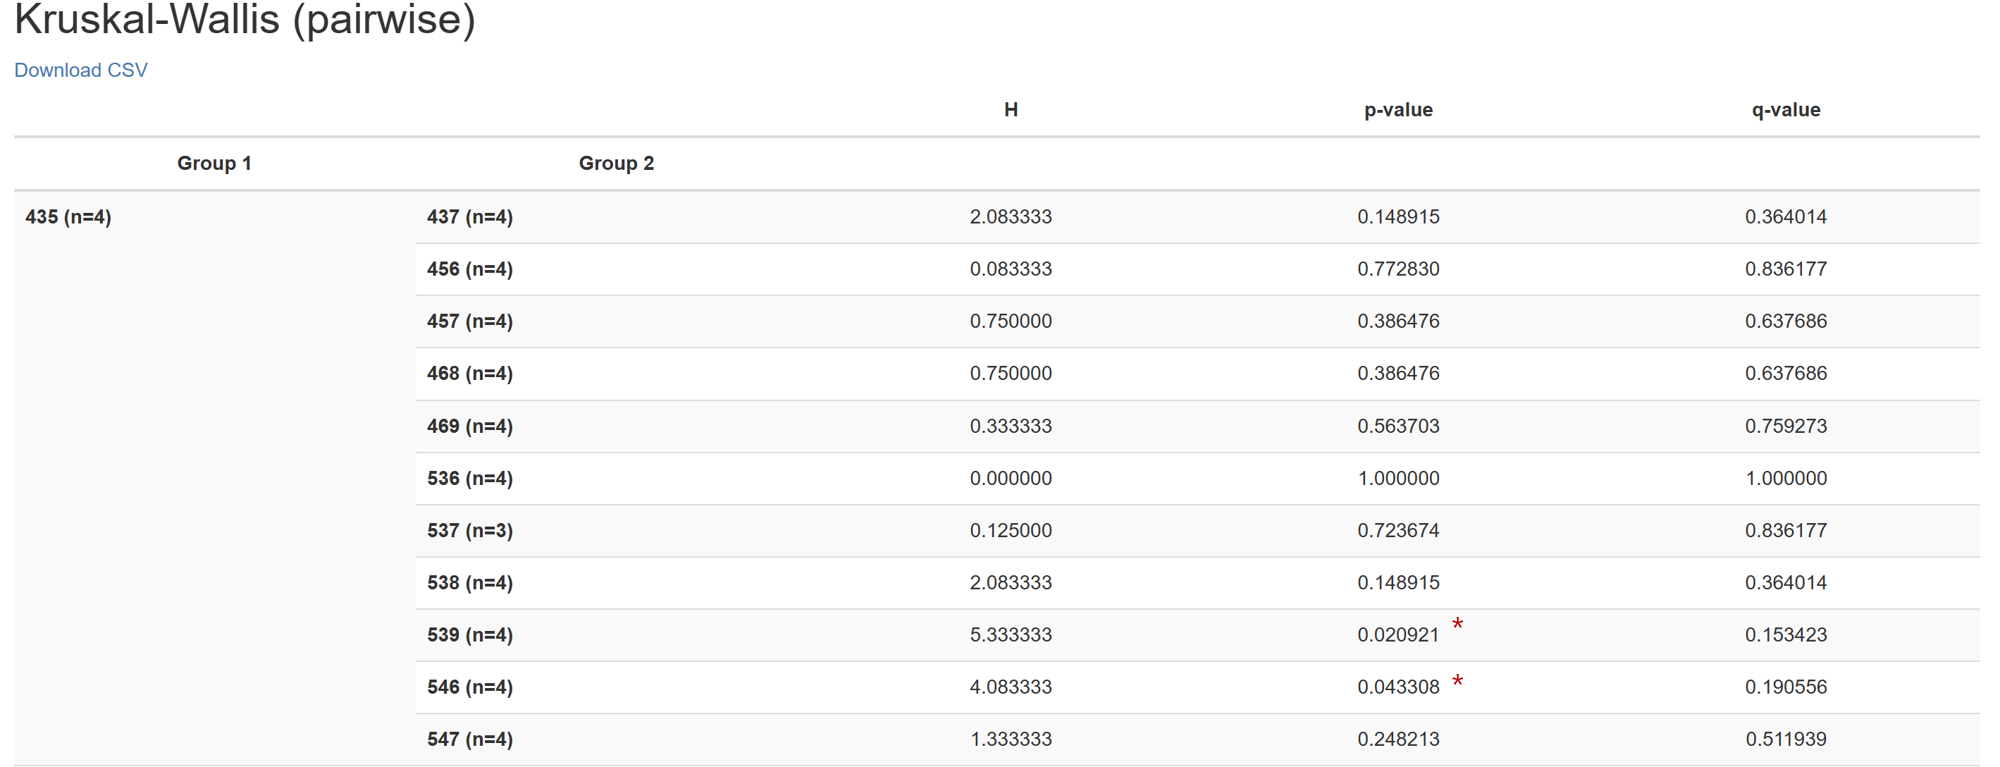
以Faith’s phylogenetic diversity為例，探究不同條件下分組之組間差異，並且進行成對比較(Pairwise)檢測差異是否顯著。

In [95]:
# distance for beta diversity
!qiime diversity beta-group-significance \
--i-distance-matrix core-metrics-results/unweighted_unifrac_distance_matrix.qza \
--m-metadata-file metadata.tsv \
--m-metadata-column genotype_and_donor_status \
--p-pairwise \
--o-visualization core-metrics-results/unweighted-unifrac-genotype_and_donor_status-significance.qzv

Saved Visualization to: core-metrics-results/unweighted-unifrac-genotype_and_donor_status-significance.qzv


- `qiime diversity beta-group-significance`: 視覺化beta多樣性之指令。
- `--i-distance-matrix`: 輸入之beta多樣性(for distance)檔案位置。
- `--m-metadata-file ...`: 輸入之metadata之位置。
- `--m-metadata-column ...`: 樣本分組依據，查看metadata中之分組，例:donor or genotype。
- `--p-pairwise ...`: 進行成對以較(pairwise)，預設只有ANOVA。
- `--o-visualization ...`: 輸出檔案位置。

In [88]:
!qiime diversity beta-group-significance --help

Usage: qiime diversity beta-group-significance [OPTIONS]

  Determine whether groups of samples are significantly different from one
  another using a permutation-based statistical test.

Inputs:
  --i-distance-matrix ARTIFACT
    DistanceMatrix     Matrix of distances between pairs of samples.
                                                                    [required]
Parameters:
  --m-metadata-file METADATA
  --m-metadata-column COLUMN  MetadataColumn[Categorical]
                       Categorical sample metadata column.          [required]
  --p-method TEXT Choices('permanova', 'anosim', 'permdisp')
                       The group significance test to be applied.
                                                        [default: 'permanova']
  --p-pairwise / --p-no-pairwise
                       Perform pairwise tests between all pairs of groups in
                       addition to the test across all groups. This can be
                       very slow if there are a lot of g

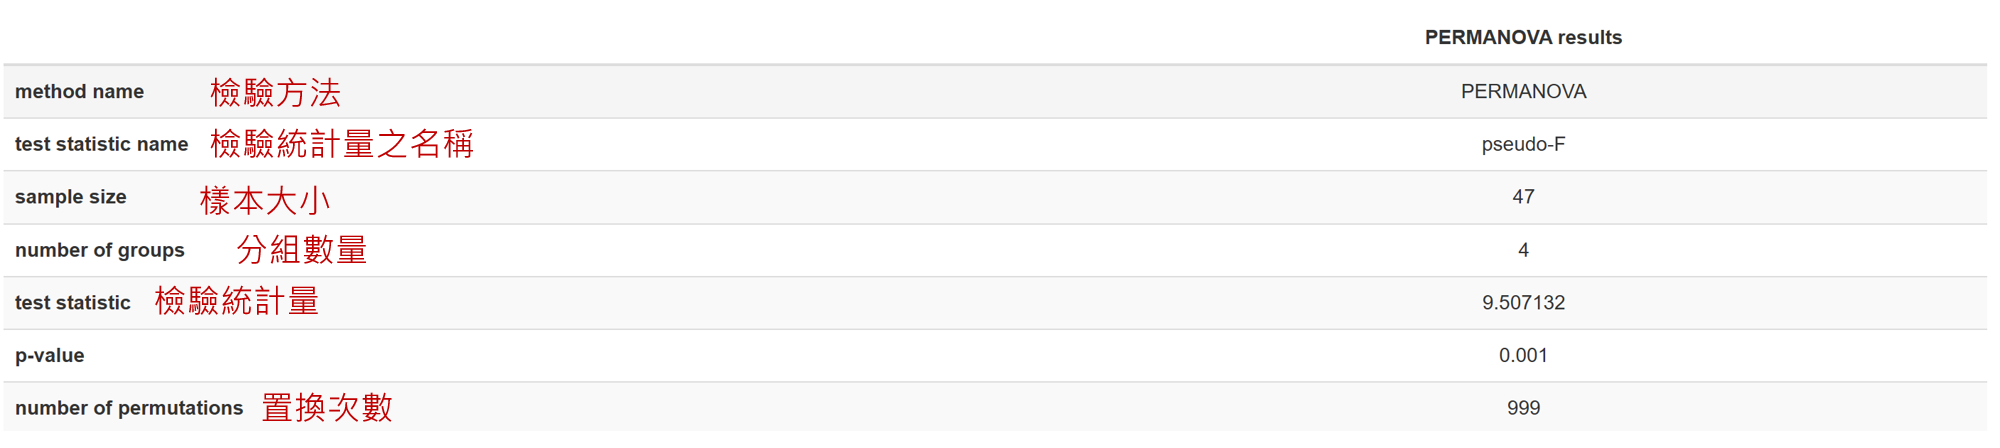
將顯示分組(donor type)之間[PERMANOVA](https://en.wikipedia.org/wiki/Permutational_analysis_of_variance)分析結果，上圖顯示按照genotype_and_donor_status分的四組小鼠之間微生物beta多樣性(distance)存在統計上之顯著差異。
- PERANOVA是一種比較兩分組之間距離，為一種無母數統計的分析方法。
- number of permutations，無母數統計中，對數據進行排序的方式的數量，用於計算 p 值。

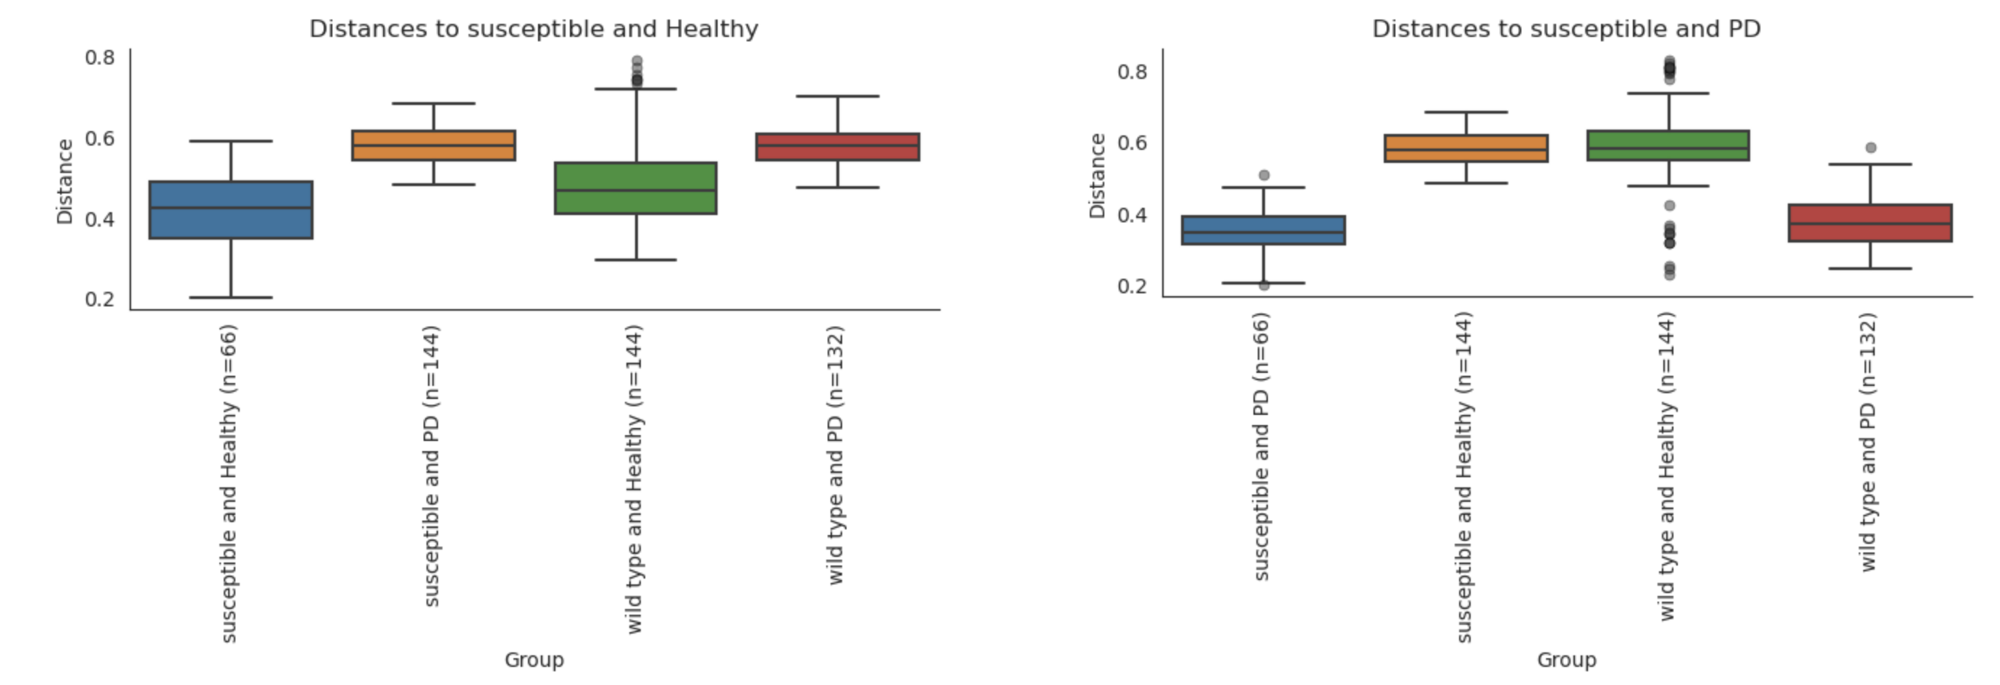
樣本總共分成四組，因此會產出四張圖，這邊只顯示其中兩個結果。兩張圖表示四個組別分別與susceptible and Healthy以及susceptible and PD兩組間的距離盒鬚圖，值越大代表兩組之間差異越大。
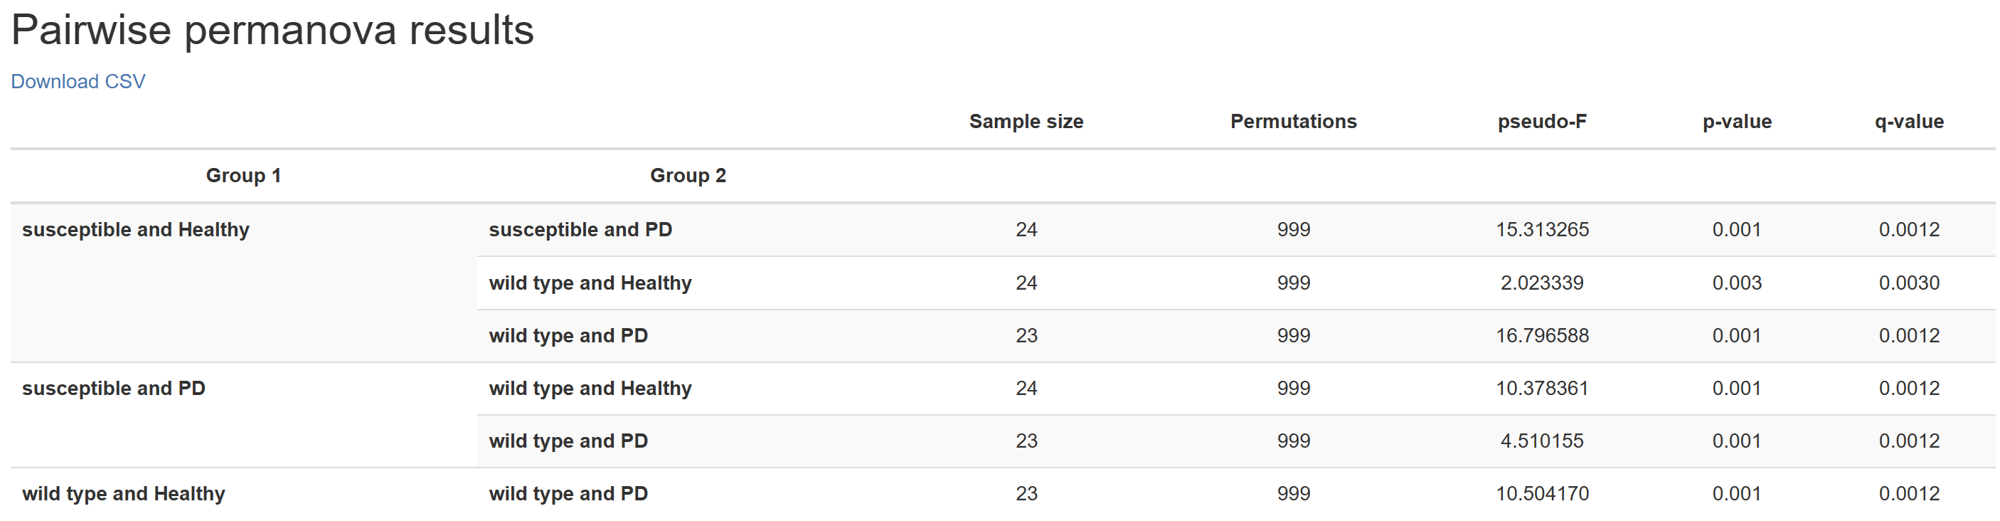
確定PERMANOVA分析組間的距離存在顯著差異後，進行成對比較(pairwise)看是哪兩組之間有顯著差異。可以看出四組之間距離皆存在顯著差異的，但從圖二可以看出，不同donor來源對距離的影響可能較genotype來的劇烈，可以將上列參數`--m-metadata-column genotype_and_donor_status`改成`--m-metadata-column donor`或`--m-metadata-column genotype`查看更詳細的分析結果。

將core-metrics-results資料夾中之bray_curtis_emperor.qzv透過emperor套件視覺化結果。
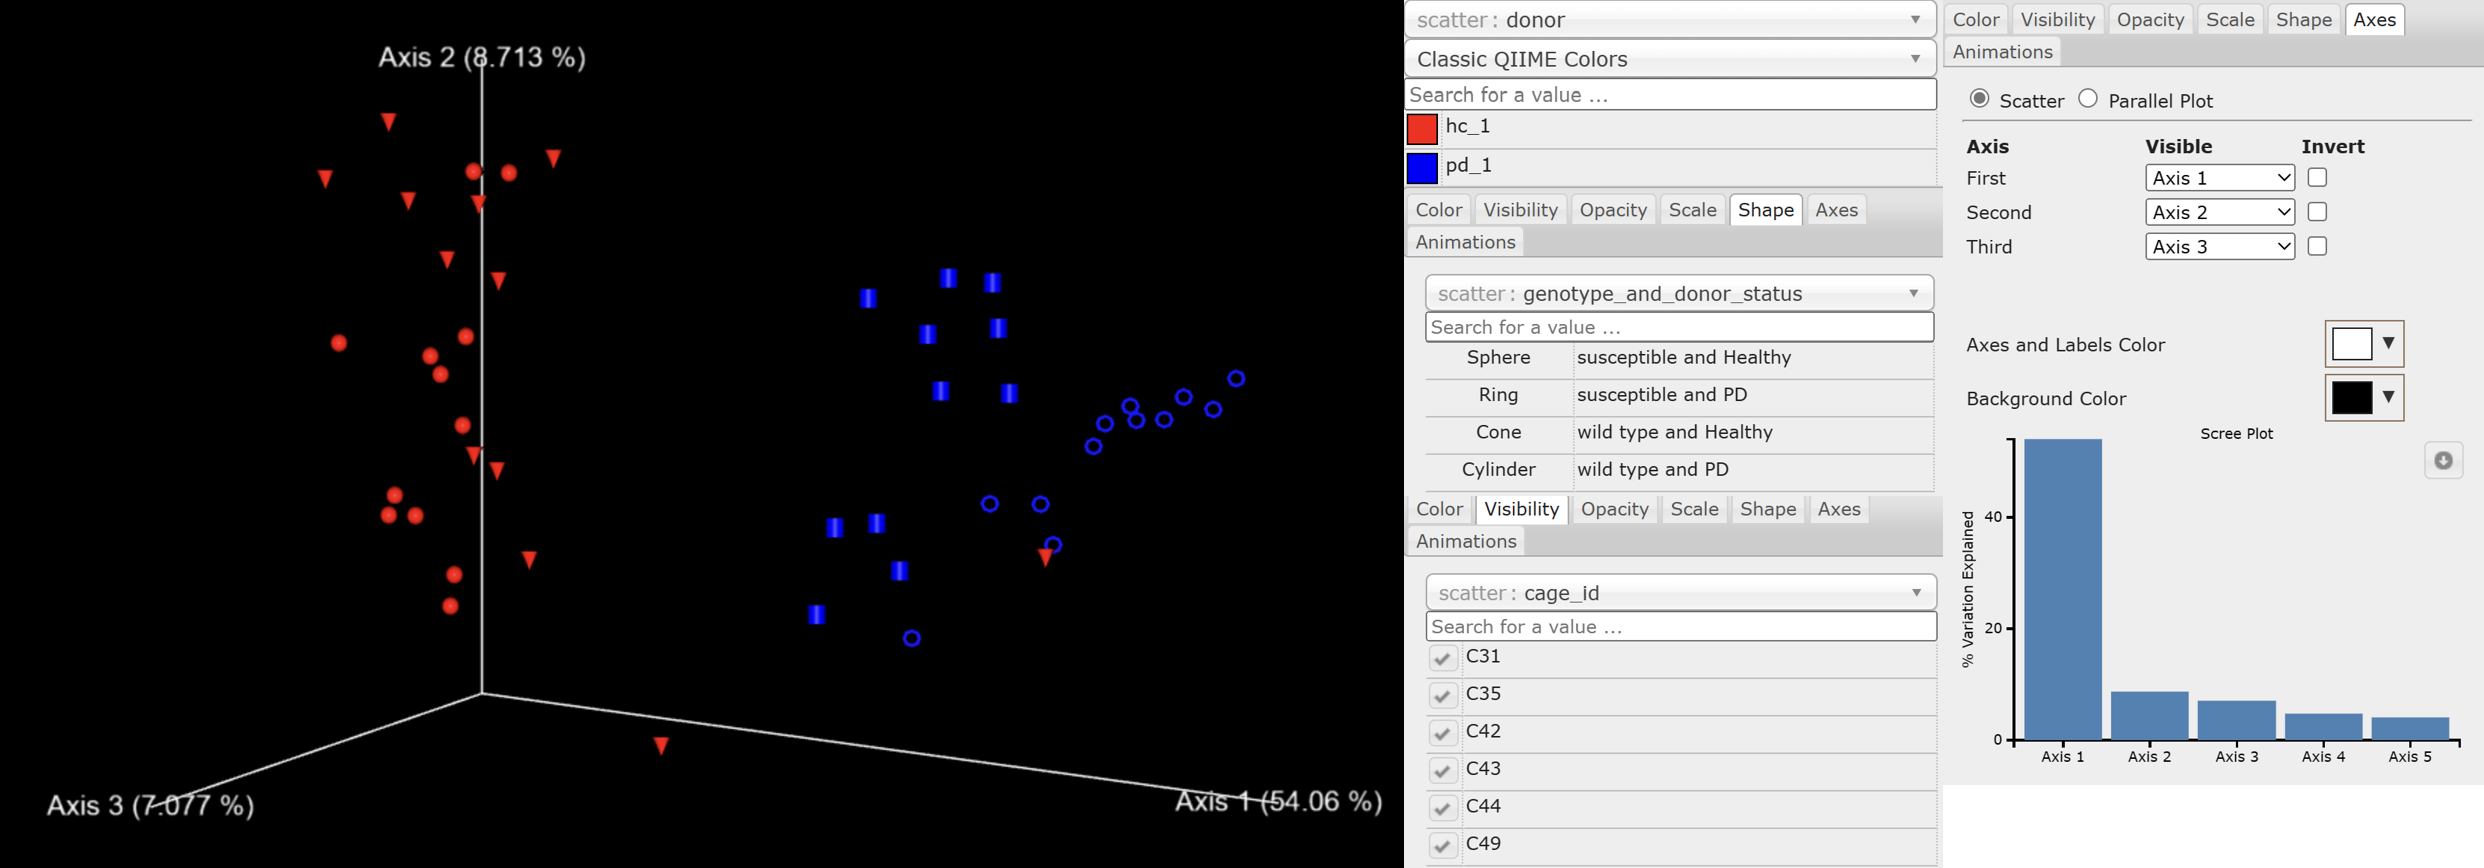
emperor是很強大的互動式PCoA(主座標分析)視覺化工具，功能有很多，這裡只顯示了其中四種功能，可以選擇樣本的分組方式，透過**Color**顏色或是**Shape**形狀表示，也可以選擇顯示**Visibility**特定分類的數據，以及可以選擇顯示的主座標**Axes**，並且標示了每個主座標所能解釋樣本中變異量的百分比。圖中每一個點代表一個樣本，相同顏色的點來自同一個分組，此處，兩點之間距離越近表明兩者的群落構成差異越小。

主成分分析PCA及主座標PCoA皆為一種資料降維方法，對多維數據進行降維，同時保持數據中雙方差異貢獻最大的特徵。如果樣品的群落組成越相似，則PCA/PCoA圖中的距離則越接近，因此群落結構相似度高的樣品會聚集在一起。PCoA主座標主要使用距離矩陣，用於在多維空間中呈現樣本之間的距離關係(讓原本數據各點間距離，跟投影裡各點間距離之間的相關最高)，而PCA主成分分析主要用於在高維數據中找到最能解釋變異性的主成分(設法保留數據裡的變異 (variance) 讓點的位置儘量不要變動)。詳細介紹可查閱[細菌人的一口書](https://bitesizemicrobook.wordpress.com/2016/07/24/%E7%B5%B1%E8%A8%8826%E5%9B%9E-pca-%E5%92%8C-pcoa-%E6%9C%89%E4%BB%80%E9%BA%BC%E4%B8%8D%E4%B8%80%E6%A8%A3/)。
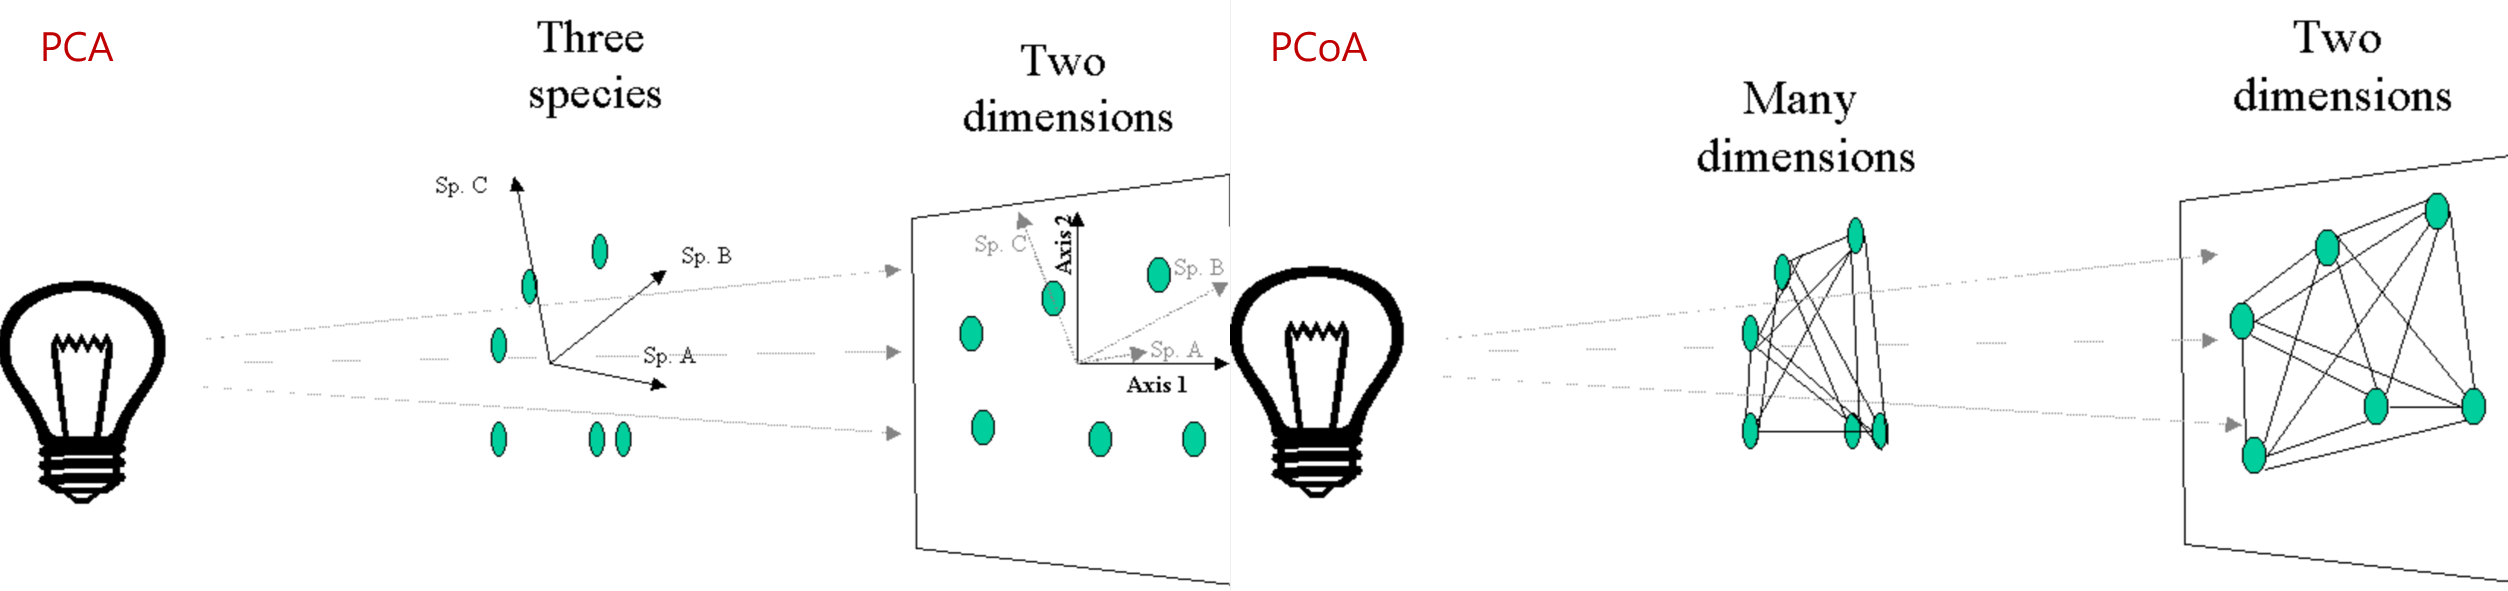

# 差異豐度分析LDA Effect Size (LEFse)
用於檢測不同樣本組之間特徵（如ASV、菌種等）的相對豐度是否存在顯著差異。這裡將使用dokdo套件，產出LEfse，並透過網頁版[Galaxy with LEfSe](https://huttenhower.sph.harvard.edu/galaxy/)進行視覺化。
```
# dokdo conda 安裝方式，使用自己的環境才需要另外安裝(HMP_env不用)
conda install -c hcc dokdo
```
進行差異豐度分析之前，過濾掉低豐度(abundance)/低出現頻率(prevalence)的ASVs，可以提供更好的分辨率。

In [106]:
!qiime feature-table filter-features \
--i-table ./dada2_table.qza \
--p-min-frequency 50 \
--p-min-samples 4 \
--o-filtered-table ./dada2_table_filtered.qza

Saved FeatureTable[Frequency] to: ./dada2_table_filtered.qza


- `qiime feature-table filter-features`: 過濾特定ASVs的指令。
- `--i-table ...`: 輸入feature table位置。
- `--p-min-frequency ...`: ASV在所有樣本中出現的總頻率低於這個值，則去除掉此ASV。
- `--p-min-samples ...`: ASV在樣本中出現的次數，低於這個值，則去除掉此ASV。
- `--o-filtered-table ...`: 輸出篩選後的filtered table。
---
- `  --m-metadata-file ...`: 輸入metadata路徑，這裡沒有用到。
- `--p-where ...`: 這裡範例並沒有用到，但輸入metadata並設定此參數可透過metadata分組，篩選特定分組的結果，如: donor = hc。

In [97]:
!qiime feature-table filter-features --help

Usage: qiime feature-table filter-features [OPTIONS]

  Filter features from table based on frequency and/or metadata. Any samples
  with a frequency of zero after feature filtering will also be removed. See
  the filtering tutorial on https://docs.qiime2.org for additional details.

Inputs:
  --i-table ARTIFACT FeatureTable[Frequency]
                       The feature table from which features should be
                       filtered.                                    [required]
Parameters:
  --p-min-frequency INTEGER
                       The minimum total frequency that a feature must have
                       to be retained.                            [default: 0]
  --p-max-frequency INTEGER
                       The maximum total frequency that a feature can have to
                       be retained. If no value is provided this will default
                       to infinity (i.e., no maximum frequency filter will be
                       applied).                       

透過dokdo產出輸入[Galaxy with LEfSe](https://huttenhower.sph.harvard.edu/galaxy/)之tsv檔。

In [109]:
!dokdo prepare-lefse \
--table-file ./dada2_table_filtered.qza \
--taxonomy-file ./taxonomy.qza \
--metadata-file ./metadata.tsv \
--class-col donor \
--output-file ./lefse_input_table.tsv

- `dokdo prepare-lefse`: 準備lefse輸入tsv之指令。
- `--table-file ...`: 輸入feature table位置，這裡所使用的是filtered table。
- `--taxonomy-file ...`: 輸入taxonomy.qza位置
- `--m-metadata-file ...`: metadata之檔案路徑。
- `--class-col ...`: 樣本分組依據。
- `--output-file ...`: tsv for lefse之檔案位置，詳細LEFSE網頁使用方式參見[16S rRNA 從次世代到三代定序-生資QIIME2資料分析趣](https://ithelp.ithome.com.tw/articles/10312346)。


In [101]:
!dokdo prepare-lefse --help

usage: dokdo prepare-lefse -t PATH -x PATH -m PATH -o PATH -c TEXT [-s TEXT]
                           [-u TEXT] [-w TEXT] [-h]

Create a TSV file which can be used as input for the LEfSe tool. This command
1) collapses the input feature table at the genus level, 2) computes relative
frequency of the features, 3) performs sample filtration if requested, 4)
changes the format of feature names, 5) adds the relevant metadata as 'Class',
'Subclass', and 'Subject', and 6) writes a text file which can be used as
input for LEfSe.

Arguments:
  -t PATH, --table-file PATH
                        Path to the table file with the
                        'FeatureTable[Frequency]' type. [required]
  -x PATH, --taxonomy-file PATH
                        Path to the taxonomy file with the
                        'FeatureData[Taxonomy]' type. [required]
  -m PATH, --metadata-file PATH
                        Path to the metadata file. [required]
  -o PATH, --output-file PATH
                        Pa

透過[Galaxy with LEfSe](https://huttenhower.sph.harvard.edu/galaxy/)視覺化結果
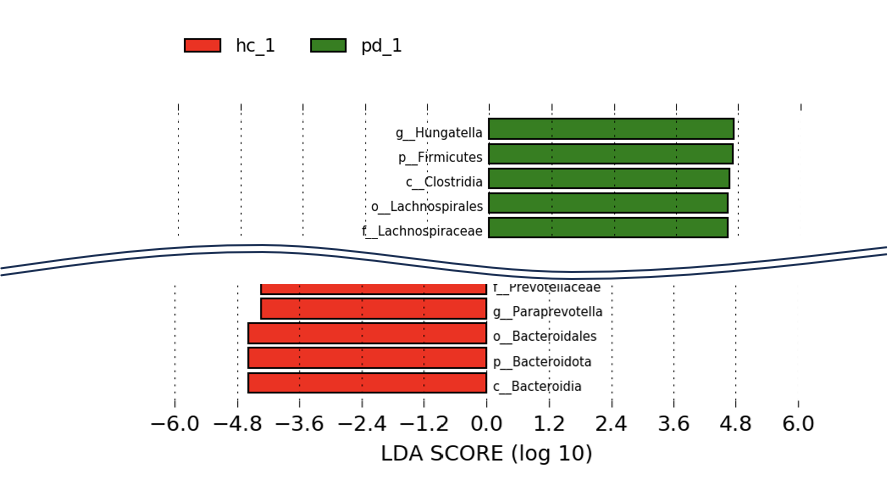
LDA 也是透過降維方式了解各樣本間的相似程度，詳細介紹可參考: [機器學習: 降維(Dimension Reduction)- 線性區別分析( Linear Discriminant Analysis)](https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E9%99%8D%E7%B6%AD-dimension-reduction-%E7%B7%9A%E6%80%A7%E5%8D%80%E5%88%A5%E5%88%86%E6%9E%90-linear-discriminant-analysis-d4c40c4cf937)。LDA分數通常用於類別組間分析，例如，在移植PD和健康組微生物小鼠之間比較微生物特徵的相對豐度比較，可以幫助識別在差異豐度分析中具有生物學或疾病相關性的特徵。如上圖顏色為綠色之菌種為在移植PD之小鼠組別中特別豐富之為生物分類，而紅色的則是在移植Health微生物小鼠中特別豐富之微生物。

In [3]:
!qiime diversity alpha-group-significance \
  --i-alpha-diversity core-metrics-results/shannon_vector.qza \
  --m-metadata-file metadata.tsv \
  --o-visualization observed_features_vector.qzv

QIIME is caching your current deployment for improved performance. This may take a few moments and should only happen once per deployment.
/work/s4107037054/miniconda3/envs/HMP_env/lib/python3.8/site-packages/qiime2/core/cache.py:440: UserWarning: Your temporary cache was found to be in an inconsistent state. It has been recreated.
  warnings.warn(
Saved Visualization to: observed_features_vector.qzv
